In [1]:
#Definições e importações de pacotes e bibliotecas

import numpy as np
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from pandas.util.testing import assert_frame_equal
! pip install pandas_datareader
import pandas_datareader.data as data

<ipython-input-1-866b00886c46>:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import matplotlib.pyplot as plt
import datetime 
import math 
from scipy import stats
! pip install plotly
import plotly.express as px
import plotly.figure_factory as ff

In [3]:
from copy import copy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
! pip install tensorflow
from tensorflow import keras 

In [4]:
# Leitura dos arquivos
soja = pd.read_excel('soja.xls')
dolar = pd.read_excel('dolar.xls')

In [5]:
# Renomeando arquivos
dolar.rename(columns={'À vista R$': 'cotacao'}, inplace = True)
dolar

,data,cotacao
0,13/03/2006,2.13
1,14/03/2006,2.13
2,15/03/2006,2.12
3,16/03/2006,2.11
4,17/03/2006,2.13
...,...,...
3810,28/06/2021,4.93
3811,29/06/2021,4.94
3812,30/06/2021,4.97
3813,01/07/2021,5.05


In [6]:
soja.rename(columns={'À vista R$': 'reais'}, inplace = True)
soja.rename(columns={'À vista US$': 'dolares'}, inplace = True)
soja

,data,reais,dolar
0,13/03/2006,27.66,12.96
1,14/03/2006,27.45,12.91
2,15/03/2006,27.58,13.00
3,16/03/2006,26.97,12.78
4,17/03/2006,26.96,12.68
...,...,...,...
3810,28/06/2021,151.10,30.67
3811,29/06/2021,151.74,30.73
3812,30/06/2021,158.12,31.80
3813,01/07/2021,163.81,32.45


In [7]:
soja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    3815 non-null   object 
 1   reais   3815 non-null   float64
 2   dolar   3815 non-null   float64
dtypes: float64(2), object(1)
memory usage: 89.5+ KB


In [8]:
dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     3815 non-null   object 
 1   cotacao  3815 non-null   float64
dtypes: float64(1), object(1)
memory usage: 59.7+ KB


In [9]:
soja.isnull().sum()

data     0
reais    0
dolar    0
dtype: int64

In [10]:
dolar.isnull().sum()

data       0
cotacao    0
dtype: int64

In [344]:
SojaReaisSemIndice = soja["reais"]
SRSI = SojaReaisSemIndice
SojaDolarSemIndice = soja["dolar"]
SDSI = SojaDolarSemIndice
CotacaoDolarSemIndice = dolar["cotacao"]
CDSI = CotacaoDolarSemIndice
#A linha a seguir só se usa no cálculo da série dólar com MMS
SRSI = SDSI

<AxesSubplot:ylabel='Valores'>

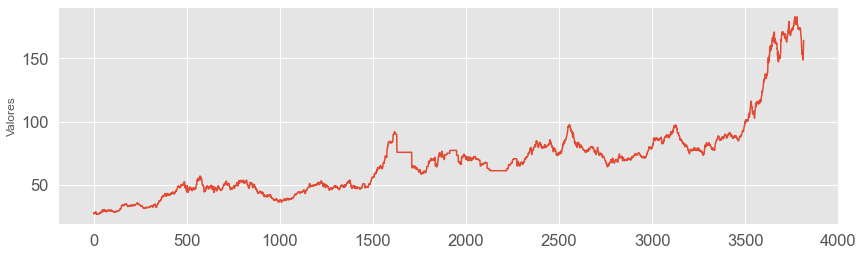

In [642]:
plt.style.use("ggplot")
plt.ylabel("Valores")
soja['reais'].plot(figsize=(14,4))

<AxesSubplot:ylabel='Valores em US$'>

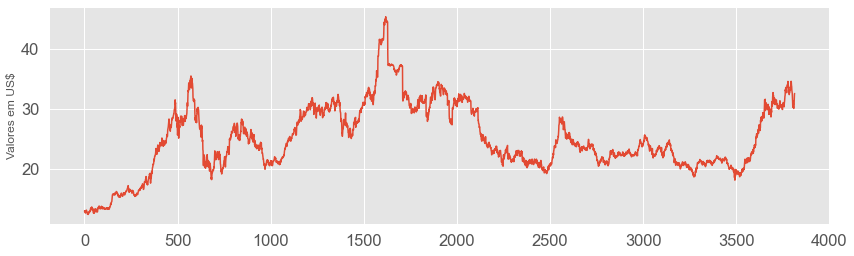

In [643]:
plt.ylabel("Valores em US$")
soja['dolar'].plot(figsize=(14,4))

In [351]:
soja.describe()

,reais,dolar
count,3815.000000,3815.000000
mean,68.759387,24.929780
std,30.115115,5.707206
min,26.570000,12.400000
25%,47.820000,21.170000
50%,67.790000,23.780000
75%,79.785000,29.510000
max,183.020000,45.320000


In [352]:
dolar.describe()

,cotacao
count,3815.000000
mean,2.801948
std,1.113784
min,1.540000
25%,1.890000
50%,2.280000
75%,3.555000
max,5.910000


<AxesSubplot:ylabel='Valores da cotação do Dólar em R$'>

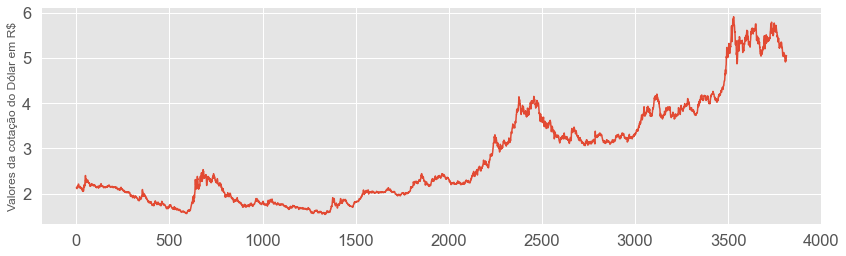

In [644]:
plt.ylabel("Valores da cotação do Dólar em R$")
dolar['cotacao'].plot(figsize=(14,4))

In [354]:
dolar[dolar["cotacao"]==dolar["cotacao"].max()]

,data,cotacao
3530,13/05/2020,5.91


In [355]:
soja[soja["dolar"]==soja["dolar"].max()]

,data,reais,dolar
1618,06/09/2012,92.0,45.32


In [356]:
soja[soja["reais"]==soja["reais"].max()]

,data,reais,dolar
3767,27/04/2021,183.02,33.49


In [357]:
dolar[dolar["cotacao"]==dolar["cotacao"].min()]

,data,cotacao
1335,25/07/2011,1.54
1336,26/07/2011,1.54


In [358]:
soja[soja["dolar"]==soja["dolar"].min()]

,data,reais,dolar
20,10/04/2006,26.74,12.4


In [359]:
soja[soja["reais"]==soja["reais"].min()]

,data,reais,dolar
16,04/04/2006,26.57,12.45


C:\Users\97733474000\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\97733474000\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



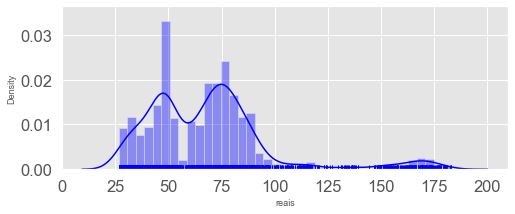

In [645]:
# Histogramas de Distribuição de Frequencias das 3 Séries
# Soja em Reais
plt.figure(figsize=(8,3))
sns.set_context('notebook', font_scale=1.5, rc={'front.size':10, 'axes.titlesize':20, 'axes.labelsize':9})
sns.distplot(soja['reais'], rug= True, color='blue')
sns.set_style('darkgrid')

C:\Users\97733474000\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\97733474000\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



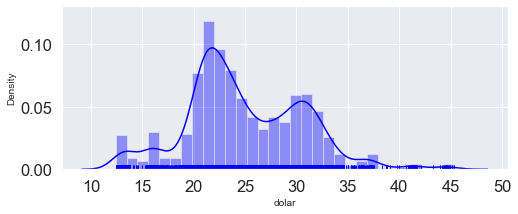

In [647]:
# Soja em Dólares
plt.figure(figsize=(8,3))
sns.set_context('notebook', font_scale=1.5, rc={'front.size':20, 'axes.titlesize':10, 'axes.labelsize':10})
sns.distplot(soja['dolar'], rug= True, color='blue')
sns.set_style('darkgrid')

C:\Users\97733474000\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\97733474000\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



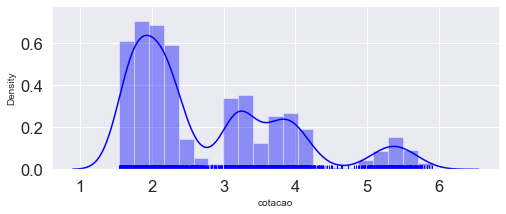

In [648]:
# Frequencias das Cotações do Dólar em reais
plt.figure(figsize=(8,3))
sns.set_context('notebook', font_scale=1.5, rc={'front.size':10, 'axes.titlesize':10, 'axes.labelsize':10})
sns.distplot(dolar['cotacao'], rug= True, color='blue')
sns.set_style('darkgrid')

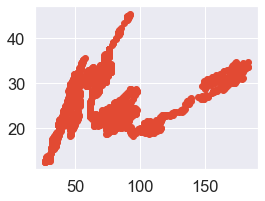

In [650]:
#Correlação entre soja em reais e soja em dólares
plt.scatter(soja["reais"],soja["dolar"])
plt.gcf().set_size_inches(4,3)
plt.show()

In [364]:
soja["reais"].corr(soja["dolar"])

0.31113265661138306

In [365]:
#Correlação entre soja em dólares e cotação do dólar
soja["dolar"].corr(dolar["cotacao"])

-0.17180188041153474

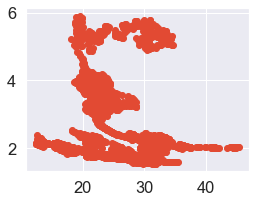

In [651]:
plt.scatter(soja["dolar"],dolar["cotacao"])
plt.gcf().set_size_inches(4,3)
plt.show()

In [367]:
#Aqui é programada uma visualização conjunta das 3 séries em escala semelhante.
razao = soja["reais"]/soja["dolar"]
np.mean(razao)

2.801922239739898

In [368]:
ms = np.mean(soja["reais"])
mc = np.mean(dolar["cotacao"])
ms/mc

24.539854791134733

In [369]:
todos = px.line(title = "Todos Juntos e Misturados")
todos.add_scatter(x=soja["data"], y=soja["reais"], name="Soja em Reais")
todos.add_scatter(x=soja["data"], y=soja["dolar"]*2.8, name="em Dólar*2,8")
todos.add_scatter(x=soja["data"], y=dolar["cotacao"]*24.5, name="Cotacao*24,5")
todos.show()

<AxesSubplot:>

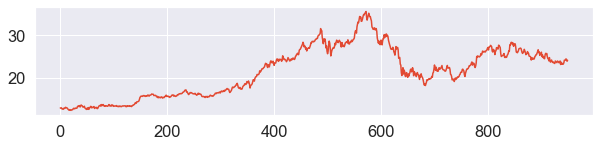

In [656]:
#A partir daqui os gráficos são subdivididos, para facilitar a visualização dos ciclos de cada série.
soja["dolar"][0:950].plot(figsize=(10,2))

<AxesSubplot:>

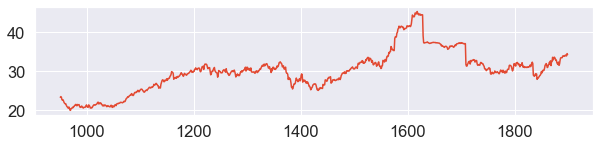

In [657]:
soja["dolar"][951:1900].plot(figsize=(10,2))

<AxesSubplot:>

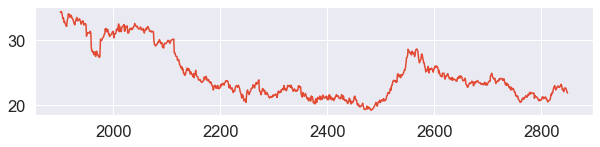

In [658]:
soja["dolar"][1901:2850].plot(figsize=(10,2))

<AxesSubplot:>

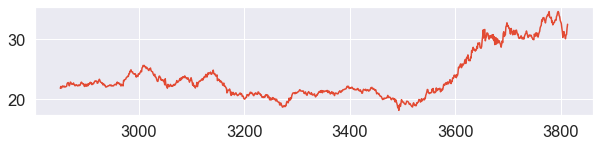

In [659]:
soja["dolar"][2851:3814].plot(figsize=(10,2))

<AxesSubplot:>

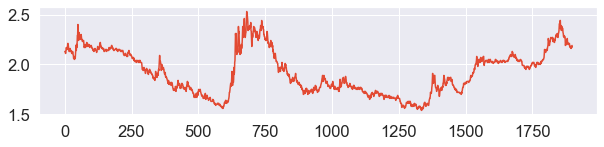

In [660]:
dolar["cotacao"][0:1900].plot(figsize=(10,2))

<AxesSubplot:>

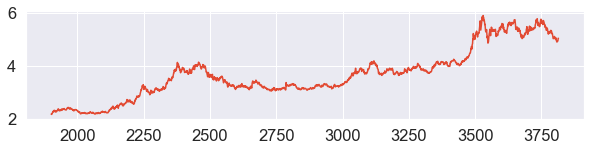

In [661]:
dolar["cotacao"][1901:3815].plot(figsize=(10,2))

In [376]:
# Aqui começa o aprendizado de máquina
# O primeiro método, mais simples ainda que a média móvel é repetir o último valor, ou média moóvel de 1 valor só
# maPe é o Erro Médio Absoluto Percentual
dife = SojaReaisSemIndice[0:3814] - SojaReaisSemIndice[0:3814]
i = 0
while(i<3814):
    dife[i] = np.abs((SojaReaisSemIndice[i+1] - SojaReaisSemIndice[i])/SojaReaisSemIndice[i])*100
    i=i+1
maPe = dife.mean()
maPe
#Há um erro médio de 52 centavos de real se simplesmente repetir o fechamento anterior (média móvel de 1 termos rs)

0.7541219745650801

In [377]:
#Agora será programada uma média móvel de 2 termos
dife02 = dife[0:3813]
i = 0
#o i vai variar de 0 a 3812
while(i<3813):
    desejado = SojaReaisSemIndice[i+2]
    previsao = (SojaReaisSemIndice[i] + SojaReaisSemIndice[i+1])/2
    dife02[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe02 = dife02.mean()
maPe02

0.9011516359242715

In [378]:
#Agora será programada uma média móvel de 3 termos
dife03 = dife[0:3812] - dife[0:3812]
i = 0
#o i vai variar de 0 a 3811
while(i<3812):
    desejado = SojaReaisSemIndice[i+3]
    previsao = (SojaReaisSemIndice[i] + SojaReaisSemIndice[i+1] + SojaReaisSemIndice[i+2])/3
    dife03[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe03 = dife03.mean()
maPe03

1.0375908390262345

In [379]:
#Agora será programada uma média móvel de 4 termos
dife04 = dife[0:3811] - dife[0:3811]
i = 0
#o i vai variar de 0 a 3810
while(i<3811):
    desejado = SojaReaisSemIndice[i+4]
    previsao = (SojaReaisSemIndice[i] + SojaReaisSemIndice[i+1] + SojaReaisSemIndice[i+2] + SojaReaisSemIndice[i+3])/4
    dife04[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe04 = dife04.mean()
maPe04

1.1687786977004633

In [380]:
#Agora será programada uma média móvel de 5 termos
dife05 = dife[0:3810] - dife[0:3810]
SRSI = SojaReaisSemIndice
i = 0
while(i<3810):
    desejado = SojaReaisSemIndice[i+5]
    previsao = (SRSI[i] + SRSI[i+1] + SRSI[i+2] + SRSI[i+3] + SRSI[i+4])/5
    dife05[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe05 = dife05.mean()
maPe05

1.2887161788994268

In [381]:
#Agora será programada uma média móvel de 6 termos
dife06 = dife[0:3809] - dife[0:3809]
i = 0
while(i<3809):
    desejado = SojaReaisSemIndice[i+6]
    previsao = (SRSI[i] + SRSI[i+1] + SRSI[i+2] + SRSI[i+3] + SRSI[i+4] + SRSI[i+5])/6
    dife06[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe06 = dife06.mean()
maPe06

1.4028271449152319

<AxesSubplot:>

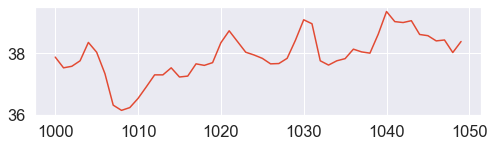

In [662]:
soja["reais"][1000:1050].plot(figsize=(8,2))
#Observa-se que até 10 dias completa-se um ciclo de suba e baixa. Portanto as médias móveis vão até 12 termos, 
#para ver se melhora os resultados e depois piora novamente

In [383]:
#Agora será programada uma média móvel de 7 termos
dife07 = dife[0:3808] - dife[0:3808]
i = 0
#o i vai variar de 0 a 3807
while(i<3808):
    desejado = SojaReaisSemIndice[i+7]
    previsao = (SRSI[i] + SRSI[i+1] + SRSI[i+2] + SRSI[i+3] + SRSI[i+4] + SRSI[i+5] + SRSI[i+6])/7
    dife07[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe07 = dife07.mean()
maPe07

1.5103556788628332

In [384]:
#Agora será programada uma média móvel de 8 termos
dife08 = dife[0:3807] - dife[0:3807]
i = 0
while(i<3807):
    desejado = SojaReaisSemIndice[i+8]
    previsao = (SRSI[i] + SRSI[i+1] + SRSI[i+2] + SRSI[i+3] + SRSI[i+4] + SRSI[i+5] + SRSI[i+6]+ SRSI[i+7])/8
    dife08[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe08 = dife08.mean()
maPe08

1.6146817254248187

In [385]:
#Na esperança de que vai diminuir o erro médio absoluto, agora será programada uma média móvel de 9 termos
dife09 = dife[0:3806] - dife[0:3806]
i = 0
#o i vai variar de 0 a 3805
while(i<3806):
    desejado = SojaReaisSemIndice[i+9]
    previsao = (SRSI[i]+SRSI[i+1]+SRSI[i+2]+SRSI[i+3]+SRSI[i+4]+SRSI[i+5]+SRSI[i+6]+SRSI[i+7]+SRSI[i+8])/9
    dife09[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe09 = dife09.mean()
maPe09

1.7148944919052136

In [386]:
# Ainda na esperança de que vai diminuir o erro médio absoluto, agora será programada uma média móvel de 10 termos
dife10 = dife[0:3805] - dife[0:3805]
i = 0
#o i vai variar de 0 a 3804
while(i<3805):
    desejado = SRSI[i+10]
    previsao=(SRSI[i]+SRSI[i+1]+SRSI[i+2]+SRSI[i+3]+SRSI[i+4]+SRSI[i+5]+SRSI[i+6]+SRSI[i+7]+SRSI[i+8]+SRSI[i+9])/10
    dife10[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe10 = dife10.mean()
maPe10

1.8092562069212486

In [387]:
# Agora será feita uma tentativa com 10 termos mais distantes
dife10d = dife[0:3795] - dife[0:3795]
i = 0
#o i vai variar de 0 a 3794
while(i<3795):
    desejado = SRSI[i+20]
    previsao=(SRSI[i]+SRSI[i+3]+SRSI[i+5]+SRSI[i+7]+SRSI[i+9]+SRSI[i+11]+SRSI[i+13]+SRSI[i+15]+SRSI[i+17]+SRSI[i+19])/10
    dife10d[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe10d = dife10d.mean()
maPe10d

2.535121399286611

In [388]:
# Agora será feita uma tentativa com 10 termos de 3 em 3 
dife10d3 = dife[0:3785] - dife[0:3785]
i = 0
#o i vai variar de 0 a 3784
while(i<3785):
    desejado = SRSI[i+30]
    previsao=(SRSI[i]+SRSI[i+4]+SRSI[i+7]+SRSI[i+10]+SRSI[i+13]+SRSI[i+16]+SRSI[i+19]+SRSI[i+22]+SRSI[i+25]+SRSI[i+28])/10
    dife10d3[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe10d3 = dife10d3.mean()
maPe10d3

3.3323950190352627

<AxesSubplot:>

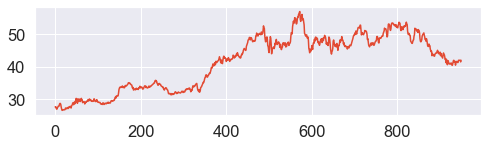

In [663]:
soja["reais"][0:950].plot(figsize=(8,2))

<AxesSubplot:>

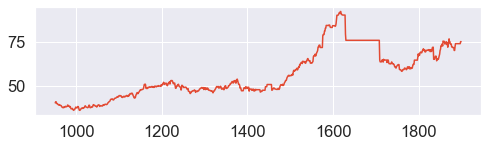

In [664]:
soja["reais"][951:1900].plot(figsize=(8,2))

<AxesSubplot:>

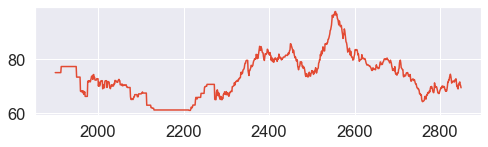

In [665]:
soja["reais"][1900:2850].plot(figsize=(8,2))

<AxesSubplot:>

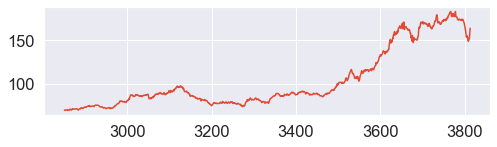

In [666]:
soja["reais"][2851:3814].plot(figsize=(8,2))

In [393]:
#Percebe-se que os ciclos da soja são longos, de 3 a 6 meses. Então a média móvel abrangerá esse período
#A primeira tentativa será com 10 termos de 11 em 11, totalizando 110 dias úteis
dife10d11 = dife[0:3705] - dife[0:3705]
pMMS11 = dife[0:3705] - dife[0:3705]
dMMS11 = dife[0:3705] - dife[0:3705]
i = 0
while(i<3705):
    desejado = SRSI[i+110]
    previsao=(SRSI[i]+SRSI[i+11]+SRSI[i+22]+SRSI[i+33]+SRSI[i+44]+SRSI[i+55]+SRSI[i+66]+SRSI[i+77]+SRSI[i+88]+SRSI[i+99])/10
    dife10d11[i] = np.abs((previsao - desejado)/desejado)*100
    pMMS11[i] = previsao
    dMMS11[i] = desejado
    i=i+1
maPe10d11 = dife10d11.mean()
maPe10d11

7.392650010803391

In [549]:
#Como a série é muito longa, os dados antigos parecem mais atrapalhar do que ajudar. Agora é de 21 em 21 dias
dife10d21 = dife[0:1062] - dife[0:1062]
pMMS21 = dife10d21 - dife10d21
dMMS21 = pMMS21 - pMMS21
#SR = SRSI
#SR = SDSI
SR = CDSI
i = 0
j=0
while(i<3540):
    if(i>=983 and i<=1336):    
        desejado = SR[i+273]
        previsao=(SR[i]+SR[i+21]+SR[i+42]+SR[i+63]+SR[i+84]+SR[i+105]+SR[i+126]+SR[i+147]+SR[i+168]+SR[i+189]+SR[i+210]+SR[i+231]+SR[i+252])/13
        dife10d21[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS21[j] = previsao
        dMMS21[j] = desejado
        j=j+1 
    elif(i>=2045 and i<=2398):    
        desejado = SR[i+273]
        previsao=(SR[i]+SR[i+21]+SR[i+42]+SR[i+63]+SR[i+84]+SR[i+105]+SR[i+126]+SR[i+147]+SR[i+168]+SR[i+189]+SR[i+210]+SR[i+231]+SR[i+252])/13
        dife10d21[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS21[j] = previsao
        dMMS21[j] = desejado
        j=j+1
    elif(i>=3107 and i<=3460):    
        desejado = SR[i+273]
        previsao=(SR[i]+SR[i+21]+SR[i+42]+SR[i+63]+SR[i+84]+SR[i+105]+SR[i+126]+SR[i+147]+SR[i+168]+SR[i+189]+SR[i+210]+SR[i+231]+SR[i+252])/13
        dife10d21[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS21[j] = previsao
        dMMS21[j] = desejado
        j=j+1
    i=i+1
maPe10d21 = dife10d21.mean()
maPe10d21

11.28089376729026

In [550]:
mms21 = px.line(title = "Resultados da MMS 1 mês no futuro")
mms21.add_scatter(y=dMMS21, name="Desejado")
mms21.add_scatter(y=pMMS21, name="Previsto pela MMS")
mms21.show()

In [467]:
# Agora é MMS de 5 em 5
dife13d5 = dife[0:1062] - dife[0:1062]
pMMS5 = dife13d5 - dife13d5
dMMS5 = pMMS5 - pMMS5
#SR = SRSI
SR = SDSI
i = 0
j=0
while(i<3540):
    if(i>=983 and i<=1336):    
        desejado = SR[i+65]
        previsao=(SR[i]+SR[i+5]+SR[i+10]+SR[i+15]+SR[i+20]+SR[i+25]+SR[i+30]+SR[i+35]+SR[i+40]+SR[i+45]+SR[i+50]+SR[i+55]+SR[i+60])/13
        dife13d5[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS5[j] = previsao
        dMMS5[j] = desejado
        j=j+1 
    elif(i>=2045 and i<=2398):  
        desejado = SR[i+65]
        previsao=(SR[i]+SR[i+5]+SR[i+10]+SR[i+15]+SR[i+20]+SR[i+25]+SR[i+30]+SR[i+35]+SR[i+40]+SR[i+45]+SR[i+50]+SR[i+55]+SR[i+60])/13
        dife13d5[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS5[j] = previsao
        dMMS5[j] = desejado
        j=j+1
    elif(i>=3107 and i<=3460):    
        desejado = SR[i+65]
        previsao=(SR[i]+SR[i+5]+SR[i+10]+SR[i+15]+SR[i+20]+SR[i+25]+SR[i+30]+SR[i+35]+SR[i+40]+SR[i+45]+SR[i+50]+SR[i+55]+SR[i+60])/13
        dife13d5[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS5[j] = previsao
        dMMS5[j] = desejado
        j=j+1
    i=i+1
maPe13d5 = dife13d5.mean()
maPe13d5

4.558852470241356

In [468]:
mms5 = px.line(title = "Resultados da MMS 1 semana no futuro")
mms5.add_scatter(y=YSD_teste["MesFuturo"], name="Desejado")
mms5.add_scatter(y=pMMS5, name="Previsto pela MMS")
mms5.show()

In [488]:
# Agora é MMS de 1 em 1
dife13d1 = dife[0:1062] - dife[0:1062] # isso tudo só p criar um vetor zerado
pMMS1 = dife13d1 - dife13d1 # isso tudo só p criar um vetor zerado
dMMS1 = pMMS1 - pMMS1 # isso tudo só p criar um vetor zerado
#SR = SRSI
SR = SDSI
i = 0
j=0
while(i<3540):
    if(i>=983 and i<=1336):    
        desejado = SR[i+13]
        previsao=(SR[i]+SR[i+1]+SR[i+2]+SR[i+3]+SR[i+4]+SR[i+5]+SR[i+6]+SR[i+7]+SR[i+8]+SR[i+9]+SR[i+10]+SR[i+11]+SR[i+12])/13
        dife13d1[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS1[j] = previsao
        dMMS1[j] = desejado
        j=j+1 
    elif(i>=2045 and i<=2398):  
        desejado = SR[i+13]
        previsao=(SR[i]+SR[i+1]+SR[i+2]+SR[i+3]+SR[i+4]+SR[i+5]+SR[i+6]+SR[i+7]+SR[i+8]+SR[i+9]+SR[i+10]+SR[i+11]+SR[i+12])/13
        dife13d1[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS1[j] = previsao
        dMMS1[j] = desejado
        j=j+1
    elif(i>=3107 and i<=3460):    
        desejado = SR[i+13]
        previsao=(SR[i]+SR[i+1]+SR[i+2]+SR[i+3]+SR[i+4]+SR[i+5]+SR[i+6]+SR[i+7]+SR[i+8]+SR[i+9]+SR[i+10]+SR[i+11]+SR[i+12])/13
        dife13d1[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS1[j] = previsao
        dMMS1[j] = desejado
        j=j+1
    i=i+1
maPe13d1 = dife13d1.mean()
maPe13d1

1.8769770233790257

In [491]:
mms1 = px.line(title = "Resultados da MMS 1 dia no futuro")
mms1.add_scatter(y=YSR_teste01["Futuro"], name="Desejado")
mms1.add_scatter(y=pMMS1, name="Previsto pela MMS")
mms1.show()

In [400]:
#Tem-se em média 250 preços ou cotações por ano. Então 1 ciclo fecha com 10 observações de 25 em 25 dias úteis
#E é essa a próxima tentativa. Se o erro não diminuir, a culpa é da não lineariedade crescente.
#Aí só resta "desinclinar" toda a série e tentar de novo.
#Será tentado de 25 em 25 dias úteis
dife10d25 = dife[0:3565] - dife[0:3565]
SR = SRSI
i = 0
#o i vai variar de 0 a 3564
while(i<3565):
    desejado = SR[i+250]
    previsao=(SR[i]+SR[i+25]+SR[i+50]+SR[i+75]+SR[i+100]+SR[i+125]+SR[i+150]+SR[i+175]+SR[i+200]+SR[i+225])/10
    dife10d25[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe10d25 = dife10d25.mean()
maPe10d25
#O erro segue subindo mesmo com o ciclo ótimo.
#Então faz-se necessário pelo menos eliminar a não-lineariedade principal
#Depois da predição, é só converter novamente a série para a escala original
#Faz-se uma média do primeiro e do último ano, depois uma média geral e ajusta-se todas para a geral

11.107319382749564

In [401]:
SR.mean()

68.75938663171672

In [402]:
SR[0:249].mean()

30.93321285140563

In [403]:
SR[3565:3814].mean()

156.79152610441758

In [404]:
#Agora será calculada a média dos 3 anos medianos, que parece ser mais representativa que a média geral para essa escala
SR[1533:2282].mean()

69.70903871829076

In [405]:
#Dividiu-se a última média pela do meio e deu 2,25. Esse mesmo valor resultou da divisão da do meio pela inicial.
#Então os primeiros valores da série serão multiplicados por 2,25 e os últimos divididos. Os próximos ao meio pouco alteram.
#Esse ajuste será feito no Excel e depois lido o arquivo modificado aqui, para não bagunçar os dados originais.
sojas = pd.read_excel('sojas.xls')

<AxesSubplot:>

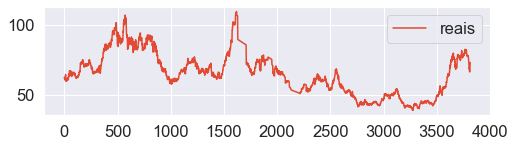

In [667]:
sojas.plot(figsize=(8,2))

In [407]:
#Pronto, ajustou-se o eixo. Média móvel com 10 amostras de 25 em 25 dias úteis. maPe é erro percentual médio absoluto
dife10d25 = dife[0:3565] - dife[0:3565]
sojas = pd.read_excel('sojas.xls')
SR=sojas["reais"]
i = 0
while(i<3565):
    desejado = SR[i+250]
    previsao=(SR[i]+SR[i+25]+SR[i+50]+SR[i+75]+SR[i+100]+SR[i+125]+SR[i+150]+SR[i+175]+SR[i+200]+SR[i+225])/10
    dife10d25[i] = np.abs((previsao - desejado)/desejado)*100
    i=i+1
maPe10d25 = dife10d25.mean()
maPe10d25
#Melhorou um pouco mas continua bem ruim a predição com médias móveis longas

11.630781518282722

In [414]:
# Aqui começam as regressões
# As séries temporais serão trabalhadas para cada uma ficar em 1 planilha, com 13 colunas de entrada e 1 de saída
soja_reais = soja
soja_dolar = soja
cotacao_dolar = dolar
#Agora só ficará a coluna de interesse em cada série, a qual servirá também como a primeira das 13 entradas
soja_reais=soja_reais.drop(columns=['data'])
soja_reais=soja_reais.drop(columns=['dolar'])
soja_dolar = soja_dolar.drop(columns=['data'])
soja_dolar = soja_dolar.drop(columns=['reais'])
cotacao_dolar = cotacao_dolar.drop(columns=['data'])

In [415]:
# Lista dos dias de 21 em 21 (mês) até fechar 1 ano. O primeiro dado é 21 dias (1 mês) no futuro.
#Criando as outras 13 colunas para a soja em reais
soja_reais["Hoje"] = soja_reais["reais"].shift(21)
soja_reais["1MesAt"] = soja_reais["reais"].shift(42)
soja_reais["2MesAt"] = soja_reais["reais"].shift(63)
soja_reais["3MesAt"] = soja_reais["reais"].shift(84)
soja_reais["4MesAt"] = soja_reais["reais"].shift(105)
soja_reais["5MesAt"] = soja_reais["reais"].shift(126)
soja_reais["6MesAt"] = soja_reais["reais"].shift(147)
soja_reais["7MesAt"] = soja_reais["reais"].shift(168)
soja_reais["8MesAt"] = soja_reais["reais"].shift(189)
soja_reais["9MesAt"] = soja_reais["reais"].shift(210)
soja_reais["10MesAt"] = soja_reais["reais"].shift(231)
soja_reais["11MesAt"] = soja_reais["reais"].shift(252)
soja_reais["12MesAt"] = soja_reais["reais"].shift(273)
soja_reais.rename(columns={'reais': 'MesFuturo'}, inplace = True)

In [417]:
#Criando as outras 13 colunas para a soja em dólares
soja_dolar["Hoje"] = soja_dolar["dolar"].shift(21)
soja_dolar["1MesAt"] = soja_dolar["dolar"].shift(42)
soja_dolar["2MesAt"] = soja_dolar["dolar"].shift(63)
soja_dolar["3MesAt"] = soja_dolar["dolar"].shift(84)
soja_dolar["4MesAt"] = soja_dolar["dolar"].shift(105)
soja_dolar["5MesAt"] = soja_dolar["dolar"].shift(126)
soja_dolar["6MesAt"] = soja_dolar["dolar"].shift(147)
soja_dolar["7MesAt"] = soja_dolar["dolar"].shift(168)
soja_dolar["8MesAt"] = soja_dolar["dolar"].shift(189)
soja_dolar["9MesAt"] = soja_dolar["dolar"].shift(210)
soja_dolar["10MesAt"] = soja_dolar["dolar"].shift(231)
soja_dolar["11MesAt"] = soja_dolar["dolar"].shift(252)
soja_dolar["12MesAt"] = soja_dolar["dolar"].shift(273)
soja_dolar.rename(columns={'dolar': 'MesFuturo'}, inplace = True)
soja_dolar

,MesFuturo,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
0,12.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,30.67,33.08,33.57,29.94,30.28,30.81,29.47,30.46,28.44,26.75,23.97,22.44,21.75,19.68
3811,30.73,33.22,33.14,29.94,30.00,31.75,29.22,29.97,29.32,26.96,23.68,22.30,21.06,19.93
3812,31.80,33.10,33.07,29.87,30.18,31.34,29.03,30.07,29.18,26.87,23.55,22.56,21.16,19.92
3813,32.45,33.75,32.67,30.82,30.24,31.20,28.63,30.56,29.28,27.35,24.07,22.69,21.03,20.01


In [418]:
#Criando as outras 13 colunas para a cotação do dólar
cotacao_dolar["Hoje"] = cotacao_dolar["cotacao"].shift(21)
cotacao_dolar["1MesAt"] = cotacao_dolar["cotacao"].shift(42)
cotacao_dolar["2MesAt"] = cotacao_dolar["cotacao"].shift(63)
cotacao_dolar["3MesAt"] = cotacao_dolar["cotacao"].shift(84)
cotacao_dolar["4MesAt"] = cotacao_dolar["cotacao"].shift(105)
cotacao_dolar["5MesAt"] = cotacao_dolar["cotacao"].shift(126)
cotacao_dolar["6MesAt"] = cotacao_dolar["cotacao"].shift(147)
cotacao_dolar["7MesAt"] = cotacao_dolar["cotacao"].shift(168)
cotacao_dolar["8MesAt"] = cotacao_dolar["cotacao"].shift(189)
cotacao_dolar["9MesAt"] = cotacao_dolar["cotacao"].shift(210)
cotacao_dolar["10MesAt"] = cotacao_dolar["cotacao"].shift(231)
cotacao_dolar["11MesAt"] = cotacao_dolar["cotacao"].shift(252)
cotacao_dolar["12MesAt"] = cotacao_dolar["cotacao"].shift(273)
cotacao_dolar.rename(columns={'cotacao': 'MesFuturo'}, inplace = True)
cotacao_dolar

,MesFuturo,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
0,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,4.93,5.25,5.36,5.75,5.51,5.51,5.12,5.37,5.61,5.40,5.56,5.12,5.15,5.58
3811,4.94,5.22,5.35,5.77,5.58,5.33,5.17,5.44,5.60,5.46,5.61,5.21,5.32,5.45
3812,4.97,5.23,5.43,5.75,5.60,5.40,5.20,5.38,5.63,5.58,5.60,5.21,5.32,5.34
3813,5.05,5.16,5.42,5.62,5.67,5.44,5.24,5.32,5.63,5.52,5.52,5.17,5.47,5.29


In [419]:
# Serão retiradas as 273 linhas que contém NaN (Não números)
# E outras 2 para arredondar múltiplo de 10
i=0
while (i<275):
    soja_reais =soja_reais.drop(i)
    i=i+1

In [420]:
# Agora para soja em dólares
i=0
while (i<275):
    soja_dolar =soja_dolar.drop(i)
    i=i+1

In [421]:
#Agora para a cotação do dólar
i=0
while (i<275):
    cotacao_dolar = cotacao_dolar.drop(i)
    i=i+1

In [422]:
# Visualizando as 3 bases de dados
soja_reais

,MesFuturo,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
275,31.42,33.29,35.59,33.60,33.00,34.69,32.94,28.84,28.57,29.35,29.18,29.03,26.82,27.58
276,31.67,32.82,35.76,33.91,33.17,35.08,33.39,28.86,28.49,29.38,29.19,29.05,27.28,26.97
277,31.56,33.07,35.82,33.59,33.20,35.00,33.69,29.33,28.49,29.35,29.25,28.61,27.26,26.96
278,31.63,33.35,35.44,33.51,33.00,35.04,33.60,29.54,28.37,29.37,29.19,29.40,27.10,27.36
279,31.82,33.54,35.57,33.46,33.50,35.04,33.70,29.58,28.82,29.95,28.55,29.23,27.04,27.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,151.10,173.77,180.06,172.05,166.74,169.69,150.98,163.62,159.47,144.52,133.20,114.85,111.92,109.84
3811,151.74,173.35,177.44,172.68,167.45,169.14,150.93,162.96,164.13,147.33,132.80,116.08,111.97,108.70
3812,158.12,172.96,179.72,171.64,168.96,169.15,150.91,161.92,164.23,149.85,131.88,117.53,112.67,106.35
3813,163.81,173.99,177.12,173.30,171.34,169.60,149.98,162.54,164.73,150.86,132.98,117.28,114.99,105.89


In [553]:
# Agora serão criados os conjuntos X para as 13 entradas e Y para a saída
# Conjuntos para Soja em Reais
XSR = soja_reais
YSR = soja_reais
#XSR = cotacao_dolar
#YSR = cotacao_dolar

XSR =XSR.drop(columns=['MesFuturo'])
XSR

,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
275,33.29,35.59,33.60,33.00,34.69,32.94,28.84,28.57,29.35,29.18,29.03,26.82,27.58
276,32.82,35.76,33.91,33.17,35.08,33.39,28.86,28.49,29.38,29.19,29.05,27.28,26.97
277,33.07,35.82,33.59,33.20,35.00,33.69,29.33,28.49,29.35,29.25,28.61,27.26,26.96
278,33.35,35.44,33.51,33.00,35.04,33.60,29.54,28.37,29.37,29.19,29.40,27.10,27.36
279,33.54,35.57,33.46,33.50,35.04,33.70,29.58,28.82,29.95,28.55,29.23,27.04,27.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,173.77,180.06,172.05,166.74,169.69,150.98,163.62,159.47,144.52,133.20,114.85,111.92,109.84
3811,173.35,177.44,172.68,167.45,169.14,150.93,162.96,164.13,147.33,132.80,116.08,111.97,108.70
3812,172.96,179.72,171.64,168.96,169.15,150.91,161.92,164.23,149.85,131.88,117.53,112.67,106.35
3813,173.99,177.12,173.30,171.34,169.60,149.98,162.54,164.73,150.86,132.98,117.28,114.99,105.89


In [554]:
YSR =YSR.drop(columns=['Hoje'])
YSR =YSR.drop(columns=['1MesAt'])
YSR =YSR.drop(columns=['2MesAt'])
YSR =YSR.drop(columns=['3MesAt'])
YSR =YSR.drop(columns=['4MesAt'])
YSR =YSR.drop(columns=['5MesAt'])
YSR =YSR.drop(columns=['6MesAt'])
YSR =YSR.drop(columns=['7MesAt'])
YSR =YSR.drop(columns=['8MesAt'])
YSR =YSR.drop(columns=['9MesAt'])
YSR =YSR.drop(columns=['10MesAt'])
YSR =YSR.drop(columns=['11MesAt'])
YSR =YSR.drop(columns=['12MesAt'])
YSR

,MesFuturo
275,31.42
276,31.67
277,31.56
278,31.63
279,31.82
...,...
3810,151.10
3811,151.74
3812,158.12
3813,163.81


In [555]:
# Soja em Dólares
XSD = soja_dolar
YSD = soja_dolar

XSD =XSD.drop(columns=['MesFuturo'])
XSD

,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
275,16.14,17.09,15.73,15.26,16.05,15.41,13.43,13.35,13.48,12.99,13.17,12.54,13.00
276,15.93,17.12,15.90,15.37,16.22,15.59,13.34,13.27,13.39,13.08,13.36,12.77,12.78
277,16.03,17.19,15.78,15.39,16.16,15.73,13.47,13.36,13.35,13.04,12.96,12.88,12.68
278,16.12,16.72,15.70,15.37,16.16,15.72,13.37,13.27,13.40,13.09,12.84,12.82,12.73
279,16.41,16.77,15.65,15.63,16.15,15.67,13.40,13.39,13.60,12.80,12.75,12.75,12.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,33.08,33.57,29.94,30.28,30.81,29.47,30.46,28.44,26.75,23.97,22.44,21.75,19.68
3811,33.22,33.14,29.94,30.00,31.75,29.22,29.97,29.32,26.96,23.68,22.30,21.06,19.93
3812,33.10,33.07,29.87,30.18,31.34,29.03,30.07,29.18,26.87,23.55,22.56,21.16,19.92
3813,33.75,32.67,30.82,30.24,31.20,28.63,30.56,29.28,27.35,24.07,22.69,21.03,20.01


In [556]:
YSD =YSD.drop(columns=['Hoje'])
YSD =YSD.drop(columns=['1MesAt'])
YSD =YSD.drop(columns=['2MesAt'])
YSD =YSD.drop(columns=['3MesAt'])
YSD =YSD.drop(columns=['4MesAt'])
YSD =YSD.drop(columns=['5MesAt'])
YSD =YSD.drop(columns=['6MesAt'])
YSD =YSD.drop(columns=['7MesAt'])
YSD =YSD.drop(columns=['8MesAt'])
YSD =YSD.drop(columns=['9MesAt'])
YSD =YSD.drop(columns=['10MesAt'])
YSD =YSD.drop(columns=['11MesAt'])
YSD =YSD.drop(columns=['12MesAt'])
YSD

,MesFuturo
275,15.44
276,15.67
277,15.57
278,15.57
279,15.63
...,...
3810,30.67
3811,30.73
3812,31.80
3813,32.45


In [557]:
# Cotação do Dólar
XCD = cotacao_dolar
YCD = cotacao_dolar

XCD =XCD.drop(columns=['MesFuturo'])
XCD

,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
275,2.06,2.08,2.14,2.16,2.16,2.14,2.15,2.14,2.18,2.25,2.20,2.14,2.12
276,2.06,2.09,2.13,2.16,2.16,2.14,2.16,2.15,2.19,2.23,2.17,2.14,2.11
277,2.06,2.08,2.13,2.16,2.17,2.14,2.18,2.13,2.20,2.24,2.21,2.12,2.13
278,2.07,2.12,2.13,2.15,2.17,2.14,2.21,2.14,2.19,2.23,2.29,2.11,2.15
279,2.04,2.12,2.14,2.14,2.17,2.15,2.21,2.15,2.20,2.23,2.29,2.12,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,5.25,5.36,5.75,5.51,5.51,5.12,5.37,5.61,5.40,5.56,5.12,5.15,5.58
3811,5.22,5.35,5.77,5.58,5.33,5.17,5.44,5.60,5.46,5.61,5.21,5.32,5.45
3812,5.23,5.43,5.75,5.60,5.40,5.20,5.38,5.63,5.58,5.60,5.21,5.32,5.34
3813,5.16,5.42,5.62,5.67,5.44,5.24,5.32,5.63,5.52,5.52,5.17,5.47,5.29


In [558]:
YCD =YCD.drop(columns=['Hoje'])
YCD =YCD.drop(columns=['1MesAt'])
YCD =YCD.drop(columns=['2MesAt'])
YCD =YCD.drop(columns=['3MesAt'])
YCD =YCD.drop(columns=['4MesAt'])
YCD =YCD.drop(columns=['5MesAt'])
YCD =YCD.drop(columns=['6MesAt'])
YCD =YCD.drop(columns=['7MesAt'])
YCD =YCD.drop(columns=['8MesAt'])
YCD =YCD.drop(columns=['9MesAt'])
YCD =YCD.drop(columns=['10MesAt'])
YCD =YCD.drop(columns=['11MesAt'])
YCD =YCD.drop(columns=['12MesAt'])
YCD

,MesFuturo
275,2.03
276,2.02
277,2.03
278,2.03
279,2.04
...,...
3810,4.93
3811,4.94
3812,4.97
3813,5.05


In [559]:
# Começa aqui a divisão entre conjuntos de treinamento e teste
# Soja em reais - Entradas
XSR_trein = XSR # Depois fica aqui só as partes 1,2,4,5,7,8e10
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    XSR_trein = XSR_trein.drop(i)
    i=i+1
i= 2045
while (i<2399):
    XSR_trein = XSR_trein.drop(i)
    i=i+1
i=3107
while (i<3461):
    XSR_trein = XSR_trein.drop(i)
    i=i+1
XSR_trein

,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
275,33.29,35.59,33.60,33.00,34.69,32.94,28.84,28.57,29.35,29.18,29.03,26.82,27.58
276,32.82,35.76,33.91,33.17,35.08,33.39,28.86,28.49,29.38,29.19,29.05,27.28,26.97
277,33.07,35.82,33.59,33.20,35.00,33.69,29.33,28.49,29.35,29.25,28.61,27.26,26.96
278,33.35,35.44,33.51,33.00,35.04,33.60,29.54,28.37,29.37,29.19,29.40,27.10,27.36
279,33.54,35.57,33.46,33.50,35.04,33.70,29.58,28.82,29.95,28.55,29.23,27.04,27.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,173.77,180.06,172.05,166.74,169.69,150.98,163.62,159.47,144.52,133.20,114.85,111.92,109.84
3811,173.35,177.44,172.68,167.45,169.14,150.93,162.96,164.13,147.33,132.80,116.08,111.97,108.70
3812,172.96,179.72,171.64,168.96,169.15,150.91,161.92,164.23,149.85,131.88,117.53,112.67,106.35
3813,173.99,177.12,173.30,171.34,169.60,149.98,162.54,164.73,150.86,132.98,117.28,114.99,105.89


In [560]:
XSR_teste = XSR # Depois fica aqui só as partes 3, 6 e 9.
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    XSR_teste = XSR_teste.drop(i)
    i=i+1
i= 1337
while (i<2045):
    XSR_teste = XSR_teste.drop(i)
    i=i+1
i=2399
while (i<3107):
    XSR_teste = XSR_teste.drop(i)
    i=i+1
i=3461
while (i<3815):
    XSR_teste = XSR_teste.drop(i)
    i=i+1
XSR_teste

,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
983,39.07,41.33,41.10,44.13,45.00,48.23,47.69,52.18,52.96,51.70,49.30,48.66,52.13
984,39.00,41.33,40.90,44.50,44.64,49.40,48.21,52.63,52.50,51.18,49.34,47.75,52.08
985,38.88,42.00,40.92,43.42,44.80,49.82,48.27,52.33,52.87,50.28,49.01,46.64,51.90
986,38.80,42.00,41.08,44.13,43.40,50.02,49.43,52.53,52.96,49.19,48.32,46.36,52.83
987,38.12,42.00,40.83,43.41,44.10,50.23,49.89,52.47,52.17,49.45,47.41,46.14,52.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,87.22,90.62,89.82,86.89,86.33,78.39,82.16,81.13,75.73,78.93,77.40,77.04,81.53
3457,87.25,91.30,89.39,87.58,87.43,78.26,82.11,80.81,75.46,78.36,79.45,78.07,81.50
3458,87.42,90.69,89.19,87.32,88.56,78.13,81.59,82.56,76.11,78.48,78.99,78.13,80.11
3459,87.13,90.23,88.91,87.06,88.52,78.79,81.80,82.66,74.69,79.03,78.31,77.68,80.45


In [561]:
# Soja em reais - Saídas
YSR_trein = YSR
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    YSR_trein = YSR_trein.drop(i)
    i=i+1
i= 2045
while (i<2399):
    YSR_trein = YSR_trein.drop(i)
    i=i+1
i=3107
while (i<3461):
    YSR_trein = YSR_trein.drop(i)
    i=i+1
YSR_trein

,MesFuturo
275,31.42
276,31.67
277,31.56
278,31.63
279,31.82
...,...
3810,151.10
3811,151.74
3812,158.12
3813,163.81


In [562]:
YSR_teste = YSR
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    YSR_teste = YSR_teste.drop(i)
    i=i+1
i= 1337
while (i<2045):
    YSR_teste = YSR_teste.drop(i)
    i=i+1
i=2399
while (i<3107):
    YSR_teste = YSR_teste.drop(i)
    i=i+1
i=3461
while (i<3815):
    YSR_teste = YSR_teste.drop(i)
    i=i+1
YSR_teste

,MesFuturo
983,38.73
984,38.27
985,38.06
986,38.32
987,37.54
...,...
3456,86.23
3457,86.00
3458,85.93
3459,85.81


In [563]:
# Soja em dólares - Entradas
XSD_trein = XSD
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    XSD_trein = XSD_trein.drop(i)
    i=i+1
i= 2045
while (i<2399):
    XSD_trein = XSD_trein.drop(i)
    i=i+1
i=3107
while (i<3461):
    XSD_trein = XSD_trein.drop(i)
    i=i+1
XSD_trein

,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
275,16.14,17.09,15.73,15.26,16.05,15.41,13.43,13.35,13.48,12.99,13.17,12.54,13.00
276,15.93,17.12,15.90,15.37,16.22,15.59,13.34,13.27,13.39,13.08,13.36,12.77,12.78
277,16.03,17.19,15.78,15.39,16.16,15.73,13.47,13.36,13.35,13.04,12.96,12.88,12.68
278,16.12,16.72,15.70,15.37,16.16,15.72,13.37,13.27,13.40,13.09,12.84,12.82,12.73
279,16.41,16.77,15.65,15.63,16.15,15.67,13.40,13.39,13.60,12.80,12.75,12.75,12.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,33.08,33.57,29.94,30.28,30.81,29.47,30.46,28.44,26.75,23.97,22.44,21.75,19.68
3811,33.22,33.14,29.94,30.00,31.75,29.22,29.97,29.32,26.96,23.68,22.30,21.06,19.93
3812,33.10,33.07,29.87,30.18,31.34,29.03,30.07,29.18,26.87,23.55,22.56,21.16,19.92
3813,33.75,32.67,30.82,30.24,31.20,28.63,30.56,29.28,27.35,24.07,22.69,21.03,20.01


In [564]:
XSD_teste = XSD
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    XSD_teste = XSD_teste.drop(i)
    i=i+1
i= 1337
while (i<2045):
    XSD_teste = XSD_teste.drop(i)
    i=i+1
i=2399
while (i<3107):
    XSD_teste = XSD_teste.drop(i)
    i=i+1
i=3461
while (i<3815):
    XSD_teste = XSD_teste.drop(i)
    i=i+1
XSD_teste

,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
983,21.28,23.19,23.78,25.58,25.03,26.34,25.25,26.29,26.15,23.30,21.96,20.71,21.99
984,20.98,23.52,23.57,25.98,24.98,26.78,25.41,27.04,26.01,23.36,22.01,20.31,22.14
985,20.82,24.12,23.71,24.95,24.83,26.83,25.74,26.99,26.24,22.65,21.80,19.52,22.28
986,20.58,24.10,23.48,25.37,24.14,26.88,26.26,26.75,26.36,22.39,21.57,19.52,22.57
987,20.51,24.10,23.43,24.73,24.61,26.93,26.20,26.71,26.48,22.74,20.69,19.68,22.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,21.48,21.56,21.72,20.92,21.20,20.79,21.33,20.21,19.00,20.45,20.77,20.29,20.90
3457,21.30,21.76,21.95,21.00,21.24,20.69,21.34,20.04,19.08,20.26,21.17,20.72,21.04
3458,21.45,21.64,22.12,20.92,21.33,20.74,21.30,20.55,19.36,19.87,21.15,20.72,20.80
3459,21.45,21.42,22.03,20.95,21.34,20.85,21.33,20.80,18.95,20.21,20.95,20.65,20.67


In [565]:
# Soja em dólares - Saídas
YSD_trein = YSD
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    YSD_trein = YSD_trein.drop(i)
    i=i+1
i= 2045
while (i<2399):
    YSD_trein = YSD_trein.drop(i)
    i=i+1
i=3107
while (i<3461):
    YSD_trein = YSD_trein.drop(i)
    i=i+1
YSD_trein

,MesFuturo
275,15.44
276,15.67
277,15.57
278,15.57
279,15.63
...,...
3810,30.67
3811,30.73
3812,31.80
3813,32.45


In [566]:
YSD_teste = YSD
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    YSD_teste = YSD_teste.drop(i)
    i=i+1
i= 1337
while (i<2045):
    YSD_teste = YSD_teste.drop(i)
    i=i+1
i=2399
while (i<3107):
    YSD_teste = YSD_teste.drop(i)
    i=i+1
i=3461
while (i<3815):
    YSD_teste = YSD_teste.drop(i)
    i=i+1
YSD_teste

,MesFuturo
983,21.44
984,21.29
985,21.36
986,21.41
987,20.95
...,...
3456,20.70
3457,20.55
3458,20.44
3459,20.46


In [567]:
# Cotação do dólar - Entradas
XCD_trein = XCD
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    XCD_trein = XCD_trein.drop(i)
    i=i+1
i= 2045
while (i<2399):
    XCD_trein = XCD_trein.drop(i)
    i=i+1
i=3107
while (i<3461):
    XCD_trein = XCD_trein.drop(i)
    i=i+1
XCD_trein

,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
275,2.06,2.08,2.14,2.16,2.16,2.14,2.15,2.14,2.18,2.25,2.20,2.14,2.12
276,2.06,2.09,2.13,2.16,2.16,2.14,2.16,2.15,2.19,2.23,2.17,2.14,2.11
277,2.06,2.08,2.13,2.16,2.17,2.14,2.18,2.13,2.20,2.24,2.21,2.12,2.13
278,2.07,2.12,2.13,2.15,2.17,2.14,2.21,2.14,2.19,2.23,2.29,2.11,2.15
279,2.04,2.12,2.14,2.14,2.17,2.15,2.21,2.15,2.20,2.23,2.29,2.12,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,5.25,5.36,5.75,5.51,5.51,5.12,5.37,5.61,5.40,5.56,5.12,5.15,5.58
3811,5.22,5.35,5.77,5.58,5.33,5.17,5.44,5.60,5.46,5.61,5.21,5.32,5.45
3812,5.23,5.43,5.75,5.60,5.40,5.20,5.38,5.63,5.58,5.60,5.21,5.32,5.34
3813,5.16,5.42,5.62,5.67,5.44,5.24,5.32,5.63,5.52,5.52,5.17,5.47,5.29


In [568]:
XCD_teste = XCD
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    XCD_teste = XCD_teste.drop(i)
    i=i+1
i= 1337
while (i<2045):
    XCD_teste = XCD_teste.drop(i)
    i=i+1
i=2399
while (i<3107):
    XCD_teste = XCD_teste.drop(i)
    i=i+1
i=3461
while (i<3815):
    XCD_teste = XCD_teste.drop(i)
    i=i+1
XCD_teste

,Hoje,1MesAt,2MesAt,3MesAt,4MesAt,5MesAt,6MesAt,7MesAt,8MesAt,9MesAt,10MesAt,11MesAt,12MesAt
983,1.84,1.78,1.73,1.73,1.80,1.83,1.89,1.98,2.03,2.22,2.24,2.35,2.37
984,1.86,1.76,1.74,1.71,1.79,1.84,1.90,1.95,2.02,2.19,2.24,2.35,2.35
985,1.87,1.74,1.73,1.74,1.80,1.86,1.88,1.94,2.01,2.22,2.25,2.39,2.33
986,1.89,1.74,1.75,1.74,1.80,1.86,1.88,1.96,2.01,2.20,2.24,2.38,2.34
987,1.86,1.74,1.74,1.76,1.79,1.87,1.90,1.96,1.97,2.17,2.29,2.34,2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,4.06,4.20,4.14,4.15,4.07,3.77,3.85,4.01,3.99,3.86,3.73,3.80,3.90
3457,4.10,4.20,4.07,4.17,4.12,3.78,3.85,4.03,3.95,3.87,3.75,3.77,3.87
3458,4.08,4.19,4.03,4.17,4.15,3.77,3.83,4.02,3.93,3.95,3.73,3.77,3.85
3459,4.06,4.21,4.04,4.16,4.15,3.78,3.83,3.97,3.94,3.91,3.74,3.76,3.89


In [569]:
# Cotação do dólar - Saídas
YCD_trein = YCD
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    YCD_trein = YCD_trein.drop(i)
    i=i+1
i= 2045
while (i<2399):
    YCD_trein = YCD_trein.drop(i)
    i=i+1
i=3107
while (i<3461):
    YCD_trein = YCD_trein.drop(i)
    i=i+1
YCD_trein

,MesFuturo
275,2.03
276,2.02
277,2.03
278,2.03
279,2.04
...,...
3810,4.93
3811,4.94
3812,4.97
3813,5.05


In [595]:
YCD_teste = YCD
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    YCD_teste = YCD_teste.drop(i)
    i=i+1
i= 1337
while (i<2045):
    YCD_teste = YCD_teste.drop(i)
    i=i+1
i=2399
while (i<3107):
    YCD_teste = YCD_teste.drop(i)
    i=i+1
i=3461
while (i<3815):
    YCD_teste = YCD_teste.drop(i)
    i=i+1
YCD_teste

,MesFuturo
983,1.81
984,1.80
985,1.78
986,1.79
987,1.79
...,...
3456,4.17
3457,4.18
3458,4.20
3459,4.19


In [596]:
# Agora pode começar o treinamento da regressão linear
# Primeiramente com soja em reais
m = LinearRegression(normalize=True)
# m.fit(XSR_trein, YSR_trein)
# A linha abaixo só é usada na série soja em dólar
#m.fit(XSD_trein, YSD_trein)
# A linha abaixo só é usada na série cotacao do dólar
m.fit(XCD_trein, YCD_trein)

LinearRegression(normalize=True)

In [597]:
r = m.predict(XCD_teste).reshape(1,-1)

In [598]:
m.coef_

array([[ 1.03997515, -0.00440765, -0.0669378 , -0.02991532,  0.20244458,
        -0.08692128, -0.07723516, -0.14606681,  0.03958653,  0.12287272,
         0.11356795, -0.13118963,  0.02549383]])

In [599]:
m.intercept_

array([0.01023687])

In [600]:
rP = pd.DataFrame(r)
rP

,0,1,2,3,4,5,6,7,8,9,...,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061
0,1.878192,1.895133,1.907353,1.921866,1.891191,1.86892,1.852911,1.902819,1.909271,1.878405,...,4.083941,4.107404,4.067437,4.071277,4.087051,4.082678,4.139784,4.137911,4.122035,4.113542


In [603]:
YCD_teste = YCD_teste.reset_index()

In [605]:
YCD_teste = YCD_teste.drop(columns=["index"])

In [606]:
YCD_teste

,MesFuturo
0,1.81
1,1.80
2,1.78
3,1.79
4,1.79
...,...
1057,4.17
1058,4.18
1059,4.20
1060,4.19


In [668]:
# Deixando tudo em 1 coluna só, para fins de comparação
rP = rP.transpose()

In [607]:
# Agora serão "plotados" os resultados previstos e os desejados
todos = px.line(title = "Resultados da Regressão Linear")
# todos.add_scatter(y=YSR_teste["MesFuturo"], name="Desejado")
todos.add_scatter(y=YCD_teste["MesFuturo"], name="Desejado")
todos.add_scatter(y=rP[0], name="Previsto")
todos.show()

In [608]:
apeRL = np.abs((rP[0]-YCD_teste["MesFuturo"])/YCD_teste["MesFuturo"])*100
apeRL

0       3.767526
1       5.285160
2       7.154642
3       7.366801
4       5.653113
          ...   
1057    2.094043
1058    0.962107
1059    1.478314
1060    1.622068
1061    2.522690
Length: 1062, dtype: float64

In [609]:
# Erro Médio Absoluto Percentual
mapeRL = apeRL.mean()
mapeRL

3.525588358397721

<AxesSubplot:>

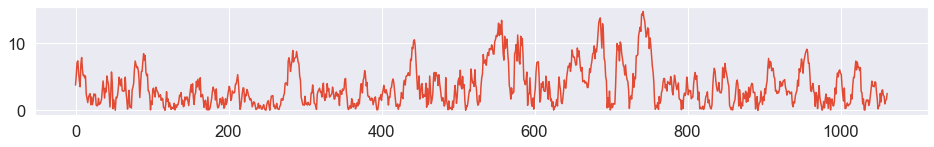

In [610]:
# Gráfico do erro da Regressão Linear
apeRL.plot(figsize=(16,2))

In [611]:
# Agora tentando prever com Redes Neurais
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [612]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(XCD_trein, YCD_trein)

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [613]:
rnSR = regr.predict(XCD_teste)
rnSR = pd.DataFrame(rnSR)

In [614]:
rnSR

,0
0,1.882858
1,1.886928
2,1.906069
3,1.911614
4,1.880912
...,...
1057,4.104465
1058,4.152879
1059,4.164073
1060,4.150463


In [615]:
# Primeiros Resultados da Rede Neural
todos = px.line(title = "Resultados da Rede Neural")
todos.add_scatter(y=YCD_teste["MesFuturo"], name="Desejado")
todos.add_scatter(y=rnSR[0], name="Previsto pela RN")
todos.show()

In [618]:
todos3 = px.line(title = "Resultados dos 3 Métodos")
todos3.add_scatter(y=YCD_teste["MesFuturo"], name="Desejado")
todos3.add_scatter(y=rP[0], name="Previsto pela RL")
todos3.add_scatter(y=rnSR[0], name="Previsto pela RN")
todos3.add_scatter(y=pMMS21, name="Previsto pela MMS")
todos3.show()

In [616]:
# Erro Absoluto Percentual
apeRN= np.abs((rnSR[0]-YCD_teste["MesFuturo"])/YCD_teste["MesFuturo"])*100
# Erro Médio Absoluto Percentual
mapeRN = apeRN.mean()
mapeRN

3.7181908853604657

In [121]:
# A partir de agora a RN terá seus parâmetros importantes modificados
regr = MLPRegressor(random_state=1, max_iter=220).fit(XSR_trein, YSR_trein)
rnSR = regr.predict(XSR_teste)
rnSR = pd.DataFrame(rnSR)
apeRN= np.abs((rnSR[0]-YSR_teste["MesFuturo"])/YSR_teste["MesFuturo"])*100
mapeRN = apeRN.mean()
mapeRN
#Nessa configuração o melhor número de iterações foi 220

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (220) reached and the optimization hasn't converged yet.



3.607933704062764

In [122]:
# Agora serão utilizados mais parâmetros # hidden_layer_sizes
regr = MLPRegressor(hidden_layer_sizes=110,random_state=1, max_iter=400).fit(XSR_trein, YSR_trein)
rnSR = regr.predict(XSR_teste)
rnSR = pd.DataFrame(rnSR)
apeRN= np.abs((rnSR[0]-YSR_teste["MesFuturo"])/YSR_teste["MesFuturo"])*100
mapeRN = apeRN.mean()
mapeRN
# Com 110 neurônios, nada muda com iterações de 220 a 400

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3.5243247836052087

In [123]:
# ativação{'identidade', 'logística', 'tanh', 'relu'}, default='relu' # Não deu certo mudar
# solver{'lbfgs', 'sgd', 'adam'}, default='adam' # lbfgs não melhorou nem com mil iterações # Sgd piorou demais
# alfaflutuador, padrão=0,0001 # melhorou com alpha=0.00099
regr = MLPRegressor(hidden_layer_sizes=110,solver='adam',alpha=0.00099,random_state=1, max_iter=220).fit(XSR_trein, YSR_trein)
rnSR = regr.predict(XSR_teste)
rnSR = pd.DataFrame(rnSR)
apeRN= np.abs((rnSR[0]-YSR_teste["MesFuturo"])/YSR_teste["MesFuturo"])*100
mapeRN = apeRN.mean()
mapeRN

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3.517041067602956

In [124]:
# learning_rate{'constant', 'invscaling', 'adaptive'}, default='constant' #Não fez diferença
# learning_rate_initduplo, default=0,001 # Não adiantou mudar para cima ou p baixo
# shufflebool, default=True # Se colocar em false só piora
# random_state = 0 também piora um pouco
regr = MLPRegressor(hidden_layer_sizes=110,alpha=0.00099,random_state=1,
                    max_iter=220).fit(XSR_trein, YSR_trein)
rnSR = regr.predict(XSR_teste)
rnSR = pd.DataFrame(rnSR)
apeRN= np.abs((rnSR[0]-YSR_teste["MesFuturo"])/YSR_teste["MesFuturo"])*100
mapeRN = apeRN.mean()
mapeRN

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3.517041067602956

In [125]:
# tolfloat, default=1e-4 # nada muda dividindo ou multiliacndo por 10 ele
# warm_startbool, default=False # Nada muda se for True
# impulsoflutuar, padrão=0,9 # também nada muda
# early_stoppingbool, default=False # Esse melhorou um pouquinho, além de deixar mais rápido

regr = MLPRegressor(hidden_layer_sizes=110,alpha=0.00099,random_state=1,early_stopping=True,
                    max_iter=500).fit(XSR_trein, YSR_trein)
rnSR = regr.predict(XSR_teste)
rnSR = pd.DataFrame(rnSR)
apeRN= np.abs((rnSR[0]-YSR_teste["MesFuturo"])/YSR_teste["MesFuturo"])*100
mapeRN = apeRN.mean()
mapeRN

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3.4851871325260135

In [126]:
# validation_fractionflutuar, default=0.1 # Nada muda
# beta_1flutuar, default=0.9 # alterar ele só piora
# beta_2 flutuar, default=0.999 #aumentar de leve ele melhorou o resultado
regr = MLPRegressor(hidden_layer_sizes=110,alpha=0.00099,random_state=1,early_stopping=True, beta_2=0.9993,
                    max_iter=500).fit(XSR_trein, YSR_trein)
rnSR = regr.predict(XSR_teste)
rnSR = pd.DataFrame(rnSR)
apeRN= np.abs((rnSR[0]-YSR_teste["MesFuturo"])/YSR_teste["MesFuturo"])*100
mapeRN = apeRN.mean()
mapeRN

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3.4819469710478868

In [127]:
# epsilonfloat, default=1e-8 # só piora se mudar
# n_iter_no_changeint, default=10 # pouco altera e piora
# max_funint, default=15000 # nada altera
regr = MLPRegressor(hidden_layer_sizes=110,alpha=0.00099,random_state=1,early_stopping=True,
                    beta_2=0.9993,max_fun=15000,max_iter=500).fit(XSR_trein, YSR_trein)
rnSR = regr.predict(XSR_teste)
rnSR = pd.DataFrame(rnSR)
apeRN= np.abs((rnSR[0]-YSR_teste["MesFuturo"])/YSR_teste["MesFuturo"])*100
mapeRN = apeRN.mean()
mapeRN

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3.4819469710478868

In [184]:
# RL e RN ficaram em empate técnico 3.48918 X 3.48194, com leve vantagem para as Redes Neurais
# Agora serão implementadas redes com 13 entradas, mas intervalos de 11, 5 e 1 entre elas.
# XSR_trein01, YSR_trein01, XSR_teste01 e YSR_teste01 serão criados para o intervalo de 1
# XSR01 e YSR01 também
# Na verdade é soja_reais01 que vai criar todas as outras variáveis
soja_reais01 = soja
soja_reais01=soja_reais01.drop(columns=['data'])
soja_reais01=soja_reais01.drop(columns=['dolar'])
soja_reais01["Hoje"] = soja_reais01["reais"].shift(1)
soja_reais01["1dAt"] = soja_reais01["reais"].shift(2)
soja_reais01["2dAt"] = soja_reais01["reais"].shift(3)
soja_reais01["3dAt"] = soja_reais01["reais"].shift(4)
soja_reais01["4dAt"] = soja_reais01["reais"].shift(5)
soja_reais01["5dAt"] = soja_reais01["reais"].shift(6)
soja_reais01["6dAt"] = soja_reais01["reais"].shift(7)
soja_reais01["7dAt"] = soja_reais01["reais"].shift(8)
soja_reais01["8dAt"] = soja_reais01["reais"].shift(9)
soja_reais01["9dAt"] = soja_reais01["reais"].shift(10)
soja_reais01["10dAt"] = soja_reais01["reais"].shift(11)
soja_reais01["11dAt"] = soja_reais01["reais"].shift(12)
soja_reais01["12dAt"] = soja_reais01["reais"].shift(13)
soja_reais01.rename(columns={'reais': 'Futuro'}, inplace = True)
soja_reais01

,Futuro,Hoje,1dAt,2dAt,3dAt,4dAt,5dAt,6dAt,7dAt,8dAt,9dAt,10dAt,11dAt,12dAt
0,27.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27.58,27.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26.97,27.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.96,27.58,27.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,151.10,149.28,155.02,153.43,161.32,166.65,170.63,173.45,173.21,173.99,173.35,173.75,173.55,173.91
3811,151.74,148.74,152.67,154.80,156.86,164.45,169.41,171.82,174.10,172.80,172.96,173.77,174.28,173.01
3812,158.12,151.10,149.28,155.02,153.43,161.32,166.65,170.63,173.45,173.21,173.99,173.35,173.75,173.55
3813,163.81,151.74,148.74,152.67,154.80,156.86,164.45,169.41,171.82,174.10,172.80,172.96,173.77,174.28


In [492]:
# Criando as colunas de 1 em 1 para a soja em dólar
soja_dolar01 = soja
soja_dolar01=soja_dolar01.drop(columns=['data'])
soja_dolar01=soja_dolar01.drop(columns=['reais'])
soja_dolar01["Hoje"] = soja_dolar01["dolar"].shift(1)
soja_dolar01["1dAt"] = soja_dolar01["dolar"].shift(2)
soja_dolar01["2dAt"] = soja_dolar01["dolar"].shift(3)
soja_dolar01["3dAt"] = soja_dolar01["dolar"].shift(4)
soja_dolar01["4dAt"] = soja_dolar01["dolar"].shift(5)
soja_dolar01["5dAt"] = soja_dolar01["dolar"].shift(6)
soja_dolar01["6dAt"] = soja_dolar01["dolar"].shift(7)
soja_dolar01["7dAt"] = soja_dolar01["dolar"].shift(8)
soja_dolar01["8dAt"] = soja_dolar01["dolar"].shift(9)
soja_dolar01["9dAt"] = soja_dolar01["dolar"].shift(10)
soja_dolar01["10dAt"] = soja_dolar01["dolar"].shift(11)
soja_dolar01["11dAt"] = soja_dolar01["dolar"].shift(12)
soja_dolar01["12dAt"] = soja_dolar01["dolar"].shift(13)
soja_dolar01.rename(columns={'dolar': 'Futuro'}, inplace = True)
soja_dolar01

,Futuro,Hoje,1dAt,2dAt,3dAt,4dAt,5dAt,6dAt,7dAt,8dAt,9dAt,10dAt,11dAt,12dAt
0,12.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.91,12.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.00,12.91,12.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.78,13.00,12.91,12.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.68,12.78,13.00,12.91,12.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,30.67,30.04,30.43,30.75,31.23,30.82,30.26,31.22,31.98,32.61,32.86,33.09,33.70,33.89
3811,30.73,30.67,30.04,30.43,30.75,31.23,30.82,30.26,31.22,31.98,32.61,32.86,33.09,33.70
3812,31.80,30.73,30.67,30.04,30.43,30.75,31.23,30.82,30.26,31.22,31.98,32.61,32.86,33.09
3813,32.45,31.80,30.73,30.67,30.04,30.43,30.75,31.23,30.82,30.26,31.22,31.98,32.61,32.86


In [623]:
# Criando as colunas de 1 em 1 para a soja em dólar
cotacao_dolar01 = dolar
cotacao_dolar01=cotacao_dolar01.drop(columns=['data'])
cotacao_dolar01["Hoje"] = cotacao_dolar01["cotacao"].shift(1)
cotacao_dolar01["1dAt"] = cotacao_dolar01["cotacao"].shift(2)
cotacao_dolar01["2dAt"] = cotacao_dolar01["cotacao"].shift(3)
cotacao_dolar01["3dAt"] = cotacao_dolar01["cotacao"].shift(4)
cotacao_dolar01["4dAt"] = cotacao_dolar01["cotacao"].shift(5)
cotacao_dolar01["5dAt"] = cotacao_dolar01["cotacao"].shift(6)
cotacao_dolar01["6dAt"] = cotacao_dolar01["cotacao"].shift(7)
cotacao_dolar01["7dAt"] = cotacao_dolar01["cotacao"].shift(8)
cotacao_dolar01["8dAt"] = cotacao_dolar01["cotacao"].shift(9)
cotacao_dolar01["9dAt"] = cotacao_dolar01["cotacao"].shift(10)
cotacao_dolar01["10dAt"] = cotacao_dolar01["cotacao"].shift(11)
cotacao_dolar01["11dAt"] = cotacao_dolar01["cotacao"].shift(12)
cotacao_dolar01["12dAt"] = cotacao_dolar01["cotacao"].shift(13)
cotacao_dolar01.rename(columns={'cotacao': 'Futuro'}, inplace = True)
cotacao_dolar01

,Futuro,Hoje,1dAt,2dAt,3dAt,4dAt,5dAt,6dAt,7dAt,8dAt,9dAt,10dAt,11dAt,12dAt
0,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.13,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.12,2.13,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.11,2.12,2.13,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.13,2.11,2.12,2.13,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12,5.06,5.07
3811,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12,5.06
3812,4.97,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12
3813,5.05,4.97,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07


In [185]:
# Serão retiradas as 273 linhas que contém NaN (Não números)
# E outras 2 para arredondar múltiplo de 10
i=0
while (i<275):
    soja_reais01 =soja_reais01.drop(i)
    i=i+1

In [493]:
# Serão retiradas as 273 linhas que contém NaN (Não números)
# E outras 2 para arredondar múltiplo de 10
i=0
while (i<275):
    soja_dolar01 =soja_dolar01.drop(i)
    i=i+1

In [624]:
# Serão retiradas as 273 linhas que contém NaN (Não números)
# E outras 2 para arredondar múltiplo de 10
i=0
while (i<275):
    cotacao_dolar01 =cotacao_dolar01.drop(i)
    i=i+1

In [625]:
cotacao_dolar01

,Futuro,Hoje,1dAt,2dAt,3dAt,4dAt,5dAt,6dAt,7dAt,8dAt,9dAt,10dAt,11dAt,12dAt
275,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03,2.03,2.03,2.03
276,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03,2.03,2.03
277,2.03,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03,2.03
278,2.03,2.03,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03
279,2.04,2.03,2.03,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12,5.06,5.07
3811,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12,5.06
3812,4.97,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12
3813,5.05,4.97,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07


In [626]:
# Agora serão criados os conjuntos X para as 13 entradas e Y para a saída
# Conjuntos para Soja em Reais
#XSR01 = soja_reais01
#YSR01 = soja_reais01
#XSR01 = soja_dolar01
#YSR01 = soja_dolar01
XSR01 = cotacao_dolar01
YSR01 = cotacao_dolar01

XSR01 =XSR01.drop(columns=['Futuro'])
XSR01

,Hoje,1dAt,2dAt,3dAt,4dAt,5dAt,6dAt,7dAt,8dAt,9dAt,10dAt,11dAt,12dAt
275,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03,2.03,2.03,2.03
276,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03,2.03,2.03
277,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03,2.03
278,2.03,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03
279,2.03,2.03,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12,5.06,5.07
3811,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12,5.06
3812,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12
3813,4.97,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07


In [627]:
YSR01 =YSR01.drop(columns=['Hoje'])
YSR01 =YSR01.drop(columns=['1dAt'])
YSR01 =YSR01.drop(columns=['2dAt'])
YSR01 =YSR01.drop(columns=['3dAt'])
YSR01 =YSR01.drop(columns=['4dAt'])
YSR01 =YSR01.drop(columns=['5dAt'])
YSR01 =YSR01.drop(columns=['6dAt'])
YSR01 =YSR01.drop(columns=['7dAt'])
YSR01 =YSR01.drop(columns=['8dAt'])
YSR01 =YSR01.drop(columns=['9dAt'])
YSR01 =YSR01.drop(columns=['10dAt'])
YSR01 =YSR01.drop(columns=['11dAt'])
YSR01 =YSR01.drop(columns=['12dAt'])
YSR01

,Futuro
275,2.03
276,2.02
277,2.03
278,2.03
279,2.04
...,...
3810,4.93
3811,4.94
3812,4.97
3813,5.05


In [628]:
# Começa aqui a divisão entre conjuntos de treinamento e teste
# Soja em reais - Entradas
XSR_trein01 = XSR01 # Depois fica aqui só as partes 1,2,4,5,7,8e10
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    XSR_trein01 = XSR_trein01.drop(i)
    i=i+1
i= 2045
while (i<2399):
    XSR_trein01 = XSR_trein01.drop(i)
    i=i+1
i=3107
while (i<3461):
    XSR_trein01 = XSR_trein01.drop(i)
    i=i+1
XSR_trein01

,Hoje,1dAt,2dAt,3dAt,4dAt,5dAt,6dAt,7dAt,8dAt,9dAt,10dAt,11dAt,12dAt
275,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03,2.03,2.03,2.03
276,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03,2.03,2.03
277,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03,2.03
278,2.03,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04,2.03
279,2.03,2.03,2.02,2.03,2.04,2.03,2.03,2.03,2.04,2.04,2.02,2.03,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12,5.06,5.07
3811,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12,5.06
3812,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07,5.12
3813,4.97,4.94,4.93,4.95,4.91,4.96,4.96,5.02,5.07,5.02,5.04,5.04,5.07


In [629]:
XSR_teste01 = XSR01 # Depois fica aqui só as partes 3, 6 e 9.
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    XSR_teste01 = XSR_teste01.drop(i)
    i=i+1
i= 1337
while (i<2045):
    XSR_teste01 = XSR_teste01.drop(i)
    i=i+1
i=2399
while (i<3107):
    XSR_teste01 = XSR_teste01.drop(i)
    i=i+1
i=3461
while (i<3815):
    XSR_teste01 = XSR_teste01.drop(i)
    i=i+1
XSR_teste01

,Hoje,1dAt,2dAt,3dAt,4dAt,5dAt,6dAt,7dAt,8dAt,9dAt,10dAt,11dAt,12dAt
983,1.83,1.83,1.83,1.81,1.81,1.82,1.83,1.86,1.85,1.85,1.85,1.87,1.89
984,1.81,1.83,1.83,1.83,1.81,1.81,1.82,1.83,1.86,1.85,1.85,1.85,1.87
985,1.80,1.81,1.83,1.83,1.83,1.81,1.81,1.82,1.83,1.86,1.85,1.85,1.85
986,1.78,1.80,1.81,1.83,1.83,1.83,1.81,1.81,1.82,1.83,1.86,1.85,1.85
987,1.79,1.78,1.80,1.81,1.83,1.83,1.83,1.81,1.81,1.82,1.83,1.86,1.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,4.18,4.20,4.19,4.16,4.19,4.18,4.13,4.14,4.08,4.09,4.05,4.06,4.07
3457,4.17,4.18,4.20,4.19,4.16,4.19,4.18,4.13,4.14,4.08,4.09,4.05,4.06
3458,4.18,4.17,4.18,4.20,4.19,4.16,4.19,4.18,4.13,4.14,4.08,4.09,4.05
3459,4.20,4.18,4.17,4.18,4.20,4.19,4.16,4.19,4.18,4.13,4.14,4.08,4.09


In [630]:
# Soja em reais - Saídas
YSR_trein01 = YSR01
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    YSR_trein01 = YSR_trein01.drop(i)
    i=i+1
i= 2045
while (i<2399):
    YSR_trein01 = YSR_trein01.drop(i)
    i=i+1
i=3107
while (i<3461):
    YSR_trein01 = YSR_trein01.drop(i)
    i=i+1
YSR_trein01

,Futuro
275,2.03
276,2.02
277,2.03
278,2.03
279,2.04
...,...
3810,4.93
3811,4.94
3812,4.97
3813,5.05


In [631]:
YSR_teste01 = YSR01
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    YSR_teste01 = YSR_teste01.drop(i)
    i=i+1
i= 1337
while (i<2045):
    YSR_teste01 = YSR_teste01.drop(i)
    i=i+1
i=2399
while (i<3107):
    YSR_teste01 = YSR_teste01.drop(i)
    i=i+1
i=3461
while (i<3815):
    YSR_teste01 = YSR_teste01.drop(i)
    i=i+1
YSR_teste01

,Futuro
983,1.81
984,1.80
985,1.78
986,1.79
987,1.79
...,...
3456,4.17
3457,4.18
3458,4.20
3459,4.19


In [632]:
# Agora pode começar o treinamento da regressão linear
# Primeiramente com soja em reais
m01 = LinearRegression(normalize=True)
m01.fit(XSR_trein01, YSR_trein01)
r01 = m01.predict(XSR_teste01).reshape(1,-1)
rP01 = pd.DataFrame(r01)
YSR_teste01 = YSR_teste01.reset_index()
YSR_teste01 = YSR_teste01.drop(columns=["index"])
rP01 = rP01.transpose()
apeRL01 = np.abs((rP01[0]-YSR_teste01["Futuro"])/YSR_teste01["Futuro"])*100
# Erro Médio Absoluto Percentual da RL01
mapeRL01 = apeRL01.mean()
mapeRL01
# O erro foi muito pequeno usando somente os últimos 13 dados, de 1 em 1

0.7073768523829388

In [633]:
# Gráfico da RL01
todos01 = px.line(title = "Resultados da Regressão Linear de 1 em 1")
todos01.add_scatter(y=YSR_teste01["Futuro"], name="Desejado")
todos01.add_scatter(y=rP01[0], name="Previsto")
todos01.show()

<AxesSubplot:>

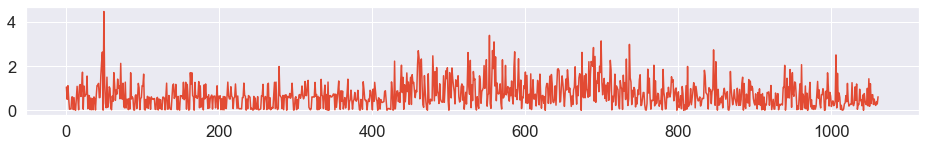

In [634]:
# Gráfico do erro da Regressão Linear 01
apeRL01.plot(figsize=(16,2))

In [635]:
regr01 = MLPRegressor(hidden_layer_sizes=50,alpha=0.00094,random_state=1,early_stopping=False,
                    beta_2=0.9993,max_iter=200).fit(XSR_trein01, YSR_trein01)
rnSR01 = regr01.predict(XSR_teste01)
rnSR01 = pd.DataFrame(rnSR01)
apeRN01= np.abs((rnSR01[0]-YSR_teste01["Futuro"])/YSR_teste01["Futuro"])*100
mapeRN01 = apeRN01.mean()
mapeRN01

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



1.6419483555968188

<AxesSubplot:>

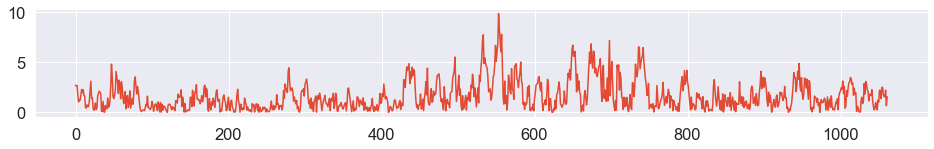

In [636]:
# Gráfico do erro da Rede Neural 01
apeRN01.plot(figsize=(16,2))

In [637]:
YSR_teste01

,Futuro
0,1.81
1,1.80
2,1.78
3,1.79
4,1.79
...,...
1057,4.17
1058,4.18
1059,4.20
1060,4.19


In [638]:
# Gráfico da RL01
todos01 = px.line(title = "Resultados da Rede Neural de 1 em 1")
todos01.add_scatter(y=YSR_teste01["Futuro"], name="Desejado")
todos01.add_scatter(y=rnSR01[0], name="Previsto")
todos01.show()
# Desta vez com leve vantagem para a Regressão Linear

In [204]:
# Ainda será implementado o de 5 em 5
# Não deve dar melhores resultados que o de 1 em 1
# Mas pelo menos será possível prever 1 semana a frente
soja_reais05 = soja
soja_reais05=soja_reais05.drop(columns=['data'])
soja_reais05=soja_reais05.drop(columns=['dolar'])
soja_reais05["Hoje"] = soja_reais05["reais"].shift(5)
soja_reais05["1sAt"] = soja_reais05["reais"].shift(10)
soja_reais05["2sAt"] = soja_reais05["reais"].shift(15)
soja_reais05["3sAt"] = soja_reais05["reais"].shift(20)
soja_reais05["4sAt"] = soja_reais05["reais"].shift(25)
soja_reais05["5sAt"] = soja_reais05["reais"].shift(30)
soja_reais05["6sAt"] = soja_reais05["reais"].shift(35)
soja_reais05["7sAt"] = soja_reais05["reais"].shift(40)
soja_reais05["8sAt"] = soja_reais05["reais"].shift(45)
soja_reais05["9sAt"] = soja_reais05["reais"].shift(50)
soja_reais05["10sAt"] = soja_reais05["reais"].shift(55)
soja_reais05["11sAt"] = soja_reais05["reais"].shift(60)
soja_reais05["12sAt"] = soja_reais05["reais"].shift(65)
soja_reais05.rename(columns={'reais': 'Futuro'}, inplace = True)
soja_reais05

,Futuro,Hoje,1sAt,2sAt,3sAt,4sAt,5sAt,6sAt,7sAt,8sAt,9sAt,10sAt,11sAt,12sAt
0,27.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,151.10,154.80,166.65,174.10,173.35,173.01,176.84,177.51,179.72,180.96,175.74,172.63,173.30,170.15
3811,151.74,155.02,164.45,173.45,172.96,173.55,176.54,177.23,177.12,182.86,177.94,174.71,173.86,170.99
3812,158.12,152.67,161.32,171.82,173.99,174.28,176.38,179.28,180.59,183.02,178.61,173.52,172.84,172.05
3813,163.81,149.28,156.86,170.63,172.80,173.75,174.08,182.97,180.37,180.06,179.32,175.17,173.65,172.68


In [473]:
# Criando colunas para a soja em dólar de 5 em 5
soja_dolar05 = soja
soja_dolar05=soja_dolar05.drop(columns=['data'])
soja_dolar05=soja_dolar05.drop(columns=['reais'])
soja_dolar05["Hoje"] = soja_dolar05["dolar"].shift(5)
soja_dolar05["1sAt"] = soja_dolar05["dolar"].shift(10)
soja_dolar05["2sAt"] = soja_dolar05["dolar"].shift(15)
soja_dolar05["3sAt"] = soja_dolar05["dolar"].shift(20)
soja_dolar05["4sAt"] = soja_dolar05["dolar"].shift(25)
soja_dolar05["5sAt"] = soja_dolar05["dolar"].shift(30)
soja_dolar05["6sAt"] = soja_dolar05["dolar"].shift(35)
soja_dolar05["7sAt"] = soja_dolar05["dolar"].shift(40)
soja_dolar05["8sAt"] = soja_dolar05["dolar"].shift(45)
soja_dolar05["9sAt"] = soja_dolar05["dolar"].shift(50)
soja_dolar05["10sAt"] = soja_dolar05["dolar"].shift(55)
soja_dolar05["11sAt"] = soja_dolar05["dolar"].shift(60)
soja_dolar05["12sAt"] = soja_dolar05["dolar"].shift(65)
soja_dolar05.rename(columns={'dolar': 'Futuro'}, inplace = True)
soja_dolar05

,Futuro,Hoje,1sAt,2sAt,3sAt,4sAt,5sAt,6sAt,7sAt,8sAt,9sAt,10sAt,11sAt,12sAt
0,12.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,30.67,30.82,32.86,34.57,33.22,32.35,33.56,33.99,33.07,32.93,31.25,30.98,30.82,30.31
3811,30.73,31.23,32.61,34.43,33.10,32.61,33.52,33.88,32.67,33.50,31.86,30.77,30.47,30.17
3812,31.80,30.75,31.98,33.89,33.75,32.66,33.62,34.32,33.24,33.49,32.11,30.31,30.47,29.94
3813,32.45,30.43,31.22,33.70,33.93,32.73,32.75,34.55,33.61,33.57,32.27,30.73,31.02,29.94


In [510]:
# Criando colunas para a cotação do dólar de 5 em 5
cotacao_dolar05 = dolar
cotacao_dolar05=cotacao_dolar05.drop(columns=['data'])
cotacao_dolar05["Hoje"] = cotacao_dolar05["cotacao"].shift(5)
cotacao_dolar05["1sAt"] = cotacao_dolar05["cotacao"].shift(10)
cotacao_dolar05["2sAt"] = cotacao_dolar05["cotacao"].shift(15)
cotacao_dolar05["3sAt"] = cotacao_dolar05["cotacao"].shift(20)
cotacao_dolar05["4sAt"] = cotacao_dolar05["cotacao"].shift(25)
cotacao_dolar05["5sAt"] = cotacao_dolar05["cotacao"].shift(30)
cotacao_dolar05["6sAt"] = cotacao_dolar05["cotacao"].shift(35)
cotacao_dolar05["7sAt"] = cotacao_dolar05["cotacao"].shift(40)
cotacao_dolar05["8sAt"] = cotacao_dolar05["cotacao"].shift(45)
cotacao_dolar05["9sAt"] = cotacao_dolar05["cotacao"].shift(50)
cotacao_dolar05["10sAt"] = cotacao_dolar05["cotacao"].shift(55)
cotacao_dolar05["11sAt"] = cotacao_dolar05["cotacao"].shift(60)
cotacao_dolar05["12sAt"] = cotacao_dolar05["cotacao"].shift(65)
cotacao_dolar05.rename(columns={'cotacao': 'Futuro'}, inplace = True)
cotacao_dolar05

,Futuro,Hoje,1sAt,2sAt,3sAt,4sAt,5sAt,6sAt,7sAt,8sAt,9sAt,10sAt,11sAt,12sAt
0,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,4.93,5.02,5.07,5.04,5.22,5.35,5.27,5.22,5.43,5.50,5.62,5.57,5.62,5.61
3811,4.94,4.96,5.04,5.04,5.23,5.32,5.27,5.23,5.42,5.46,5.59,5.68,5.71,5.67
3812,4.97,4.96,5.04,5.07,5.16,5.34,5.25,5.22,5.43,5.46,5.56,5.72,5.67,5.75
3813,5.05,4.91,5.02,5.06,5.09,5.31,5.32,5.30,5.37,5.36,5.56,5.70,5.60,5.77


In [205]:
# Serão retiradas as 273 linhas que contém NaN (Não números)
# E outras 2 para arredondar múltiplo de 10
i=0
while (i<275):
    soja_reais05 =soja_reais05.drop(i)
    i=i+1

In [511]:
# Serão retiradas as 273 linhas que contém NaN (Não números)
# E outras 2 para arredondar múltiplo de 10
i=0
while (i<275):
    cotacao_dolar05 =cotacao_dolar05.drop(i)
    i=i+1

In [474]:
# Serão retiradas as 273 linhas que contém NaN (Não números)
# E outras 2 para arredondar múltiplo de 10
i=0
while (i<275):
    soja_dolar05 =soja_dolar05.drop(i)
    i=i+1

In [512]:
# Agora serão criados os conjuntos X para as 13 entradas e Y para a saída
# Conjuntos para Soja em Reais
#XSR05 = soja_reais05
#YSR05 = soja_reais05
#XSR05 = soja_dolar05
#YSR05 = soja_dolar05
XSR05 = cotacao_dolar05
YSR05 = cotacao_dolar05

XSR05 =XSR05.drop(columns=['Futuro'])
YSR05 =YSR05.drop(columns=['Hoje'])
YSR05 =YSR05.drop(columns=['1sAt'])
YSR05 =YSR05.drop(columns=['2sAt'])
YSR05 =YSR05.drop(columns=['3sAt'])
YSR05 =YSR05.drop(columns=['4sAt'])
YSR05 =YSR05.drop(columns=['5sAt'])
YSR05 =YSR05.drop(columns=['6sAt'])
YSR05 =YSR05.drop(columns=['7sAt'])
YSR05 =YSR05.drop(columns=['8sAt'])
YSR05 =YSR05.drop(columns=['9sAt'])
YSR05 =YSR05.drop(columns=['10sAt'])
YSR05 =YSR05.drop(columns=['11sAt'])
YSR05 =YSR05.drop(columns=['12sAt'])

In [513]:
# Começa aqui a divisão entre conjuntos de treinamento e teste
# Soja em reais - Entradas
XSR_trein05 = XSR05 # Depois fica aqui só as partes 1,2,4,5,7,8e10
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    XSR_trein05 = XSR_trein05.drop(i)
    i=i+1
i= 2045
while (i<2399):
    XSR_trein05 = XSR_trein05.drop(i)
    i=i+1
i=3107
while (i<3461):
    XSR_trein05 = XSR_trein05.drop(i)
    i=i+1

In [514]:
XSR_teste05 = XSR05 # Depois fica aqui só as partes 3, 6 e 9.
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    XSR_teste05 = XSR_teste05.drop(i)
    i=i+1
i= 1337
while (i<2045):
    XSR_teste05 = XSR_teste05.drop(i)
    i=i+1
i=2399
while (i<3107):
    XSR_teste05 = XSR_teste05.drop(i)
    i=i+1
i=3461
while (i<3815):
    XSR_teste05 = XSR_teste05.drop(i)
    i=i+1

In [515]:
# Soja em reais - Saídas
YSR_trein05 = YSR05
# Agora é "dropar" as linhas que não são do treinamento, ou seja: 3, 6 e 9
i=983
while (i<1337):
    YSR_trein05 = YSR_trein05.drop(i)
    i=i+1
i= 2045
while (i<2399):
    YSR_trein05 = YSR_trein05.drop(i)
    i=i+1
i=3107
while (i<3461):
    YSR_trein05 = YSR_trein05.drop(i)
    i=i+1

In [516]:
YSR_teste05 = YSR05
# Agora é "dropar" as linhas que não são do teste, ou seja:1e2, 4e5, 7e8, 10.
i=275
while (i<983):
    YSR_teste05 = YSR_teste05.drop(i)
    i=i+1
i= 1337
while (i<2045):
    YSR_teste05 = YSR_teste05.drop(i)
    i=i+1
i=2399
while (i<3107):
    YSR_teste05 = YSR_teste05.drop(i)
    i=i+1
i=3461
while (i<3815):
    YSR_teste05 = YSR_teste05.drop(i)
    i=i+1

In [517]:
# Agora pode começar o treinamento da regressão linear
# Primeiramente com soja em reais
m05 = LinearRegression(normalize=True)
m05.fit(XSR_trein05, YSR_trein05)
r05 = m05.predict(XSR_teste05).reshape(1,-1)
rP05 = pd.DataFrame(r05)
YSR_teste05 = YSR_teste05.reset_index()
YSR_teste05 = YSR_teste05.drop(columns=["index"])
rP05 = rP05.transpose()
apeRL05 = np.abs((rP05[0]-YSR_teste05["Futuro"])/YSR_teste05["Futuro"])*100
# Erro Médio Absoluto Percentual da RL05
mapeRL05 = apeRL05.mean()
mapeRL05

1.626937353241561

In [518]:
# Gráfico da RL05
todos05 = px.line(title = "Resultados da Regressão Linear de 5 em 5")
todos05.add_scatter(y=YSR_teste05["Futuro"], name="Desejado")
todos05.add_scatter(y=rP05[0], name="Previsto")
todos05.show()

<AxesSubplot:>

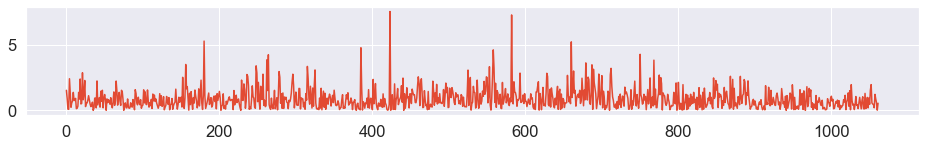

In [519]:
# Gráfico do erro da Regressão Linear 05
apeRL01.plot(figsize=(16,2))

In [520]:
# Rede Neural prevendo 5 dias a frente (1 semana)
regr05 = MLPRegressor(hidden_layer_sizes=37,alpha=0.00091,random_state=1,early_stopping=False,
                    beta_2=0.9992,max_iter=400).fit(XSR_trein05, YSR_trein05)
rnSR05 = regr05.predict(XSR_teste05)
rnSR05 = pd.DataFrame(rnSR05)
apeRN05= np.abs((rnSR05[0]-YSR_teste05["Futuro"])/YSR_teste05["Futuro"])*100
mapeRN05 = apeRN05.mean()
mapeRN05

C:\Users\97733474000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



1.8822716386860618

<AxesSubplot:>

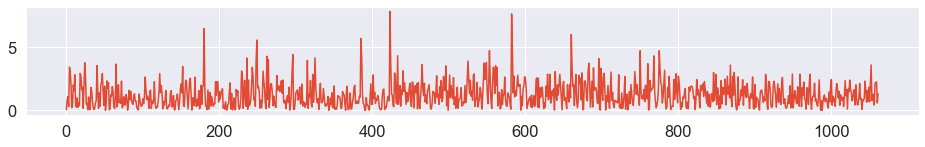

In [521]:
# Gráfico do erro da Rede Neural 05
apeRN01.plot(figsize=(16,2))

In [522]:
# Gráfico da RN05
RN05 = px.line(title = "Resultados da Rede Neural 1 semana no futuro")
RN05.add_scatter(y=YSR_teste05["Futuro"], name="Desejado")
RN05.add_scatter(y=rnSR05[0], name="Previsto")
RN05.show()

In [619]:
# Agora é MMS de 1 em 1
dife13d1 = dife[0:1062] - dife[0:1062] # isso tudo só p criar um vetor zerado
pMMS1 = dife13d1 - dife13d1 # isso tudo só p criar um vetor zerado
dMMS1 = pMMS1 - pMMS1 # isso tudo só p criar um vetor zerado
#SR = SRSI
#SR = SDSI
SR = CDSI
i = 0
j=0
while(i<3540):
    if(i>=983 and i<=1336):    
        desejado = SR[i+13]
        previsao=(SR[i]+SR[i+1]+SR[i+2]+SR[i+3]+SR[i+4]+SR[i+5]+SR[i+6]+SR[i+7]+SR[i+8]+SR[i+9]+SR[i+10]+SR[i+11]+SR[i+12])/13
        dife13d1[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS1[j] = previsao
        dMMS1[j] = desejado
        j=j+1 
    elif(i>=2045 and i<=2398):  
        desejado = SR[i+13]
        previsao=(SR[i]+SR[i+1]+SR[i+2]+SR[i+3]+SR[i+4]+SR[i+5]+SR[i+6]+SR[i+7]+SR[i+8]+SR[i+9]+SR[i+10]+SR[i+11]+SR[i+12])/13
        dife13d1[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS1[j] = previsao
        dMMS1[j] = desejado
        j=j+1
    elif(i>=3107 and i<=3460):    
        desejado = SR[i+13]
        previsao=(SR[i]+SR[i+1]+SR[i+2]+SR[i+3]+SR[i+4]+SR[i+5]+SR[i+6]+SR[i+7]+SR[i+8]+SR[i+9]+SR[i+10]+SR[i+11]+SR[i+12])/13
        dife13d1[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS1[j] = previsao
        dMMS1[j] = desejado
        j=j+1
    i=i+1
maPe13d1 = dife13d1.mean()
maPe13d1

1.5097248018957035

In [621]:
mms1 = px.line(title = "Resultados da MMS 1 dia no futuro")
mms1.add_scatter(y=dMMS1, name="Desejado")
mms1.add_scatter(y=pMMS1, name="Previsto pela MMS")
mms1.show()

In [527]:
# Gráfico de todos 1 semana no futuro
todos05 = px.line(title = "Resultados dos 3 métodos 1 semana no futuro")
todos05.add_scatter(y=pMMS5, name="Previsto pela MMS")
todos05.add_scatter(y=YSR_teste05["Futuro"], name="Desejado")
todos05.add_scatter(y=rP05[0], name="Previsto pela RL")
todos05.add_scatter(y=rnSR05[0], name="Previsto pela RN")
todos05.show()

In [639]:
# Os 3 métodos 1 dia no futuro
todos1 = px.line(title = "Resultados de Todos 1 dia no futuro")
todos1.add_scatter(y=YSR_teste01["Futuro"], name="Desejado")
todos1.add_scatter(y=rP01[0], name="Previsto pela RL")
todos1.add_scatter(y=pMMS1, name="Previsto pela MMS")
todos1.add_scatter(y=rnSR01[0], name="Previsto pela RN")
todos1.show()

In [524]:
# Agora é MMS de 5 em 5
dife13d5 = dife[0:1062] - dife[0:1062]
pMMS5 = dife13d5 - dife13d5
dMMS5 = pMMS5 - pMMS5
#SR = SRSI
#SR = SDSI
SR = CDSI

i = 0
j=0
while(i<3540):
    if(i>=983 and i<=1336):    
        desejado = SR[i+65]
        previsao=(SR[i]+SR[i+5]+SR[i+10]+SR[i+15]+SR[i+20]+SR[i+25]+SR[i+30]+SR[i+35]+SR[i+40]+SR[i+45]+SR[i+50]+SR[i+55]+SR[i+60])/13
        dife13d5[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS5[j] = previsao
        dMMS5[j] = desejado
        j=j+1 
    elif(i>=2045 and i<=2398):  
        desejado = SR[i+65]
        previsao=(SR[i]+SR[i+5]+SR[i+10]+SR[i+15]+SR[i+20]+SR[i+25]+SR[i+30]+SR[i+35]+SR[i+40]+SR[i+45]+SR[i+50]+SR[i+55]+SR[i+60])/13
        dife13d5[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS5[j] = previsao
        dMMS5[j] = desejado
        j=j+1
    elif(i>=3107 and i<=3460):    
        desejado = SR[i+65]
        previsao=(SR[i]+SR[i+5]+SR[i+10]+SR[i+15]+SR[i+20]+SR[i+25]+SR[i+30]+SR[i+35]+SR[i+40]+SR[i+45]+SR[i+50]+SR[i+55]+SR[i+60])/13
        dife13d5[j] = np.abs((previsao - desejado)/desejado)*100
        pMMS5[j] = previsao
        dMMS5[j] = desejado
        j=j+1
    i=i+1
maPe13d5 = dife13d5.mean()
maPe13d5

3.941231407240288

In [526]:
mms5 = px.line(title = "Resultados da MMS 1 semana no futuro")
mms5.add_scatter(y=YCD_teste["MesFuturo"], name="Desejado")
mms5.add_scatter(y=pMMS5, name="Previsto pela MMS")
mms5.show()